# EDA Notebook

What we know from the ETL:
- Data is recorded between 01/Jan/2021 till Midnight of 01/Jan/2024
- Electricity Consumption and Electricity Generation Datasets have a granularity of 15 minutes, some values during change from daysaving time to winter time are missing
- Capacity Installed Dataset has only a granularity of years
- Market price data has a granularity of 1 hour


In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Loading of cleansed data

In [224]:
df_IGC = pd.read_pickle('../Data Cleansed/Installed_capacity.pkl')
df_RGE = pd.read_pickle('../Data Cleansed/Real_generated_energy.pkl')
df_RConE = pd.read_pickle('../Data Cleansed/Real_consumed_energy.pkl')
df_MP = pd.read_pickle('../Data Cleansed/Market_price.pkl')

In [225]:
sns.set_style(style='darkgrid')

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



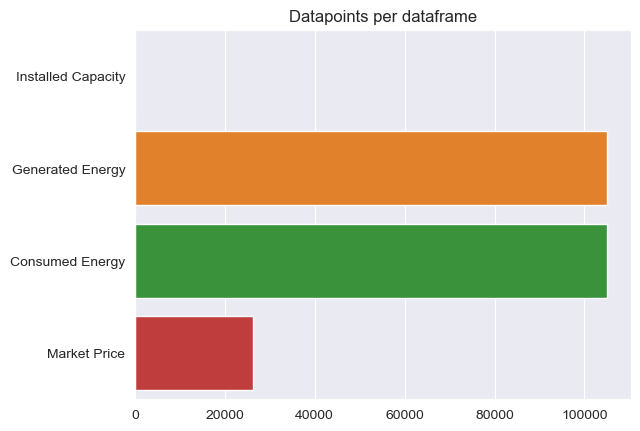

In [226]:
# Number of data points in the datasets:
labels = ['Installed Capacity', 'Generated Energy','Consumed Energy','Market Price']
counts = [df_IGC.shape[0], df_RGE.shape[0], df_RConE.shape[0], df_MP.shape[0]]

sns.barplot(y= labels, x=counts)
plt.title('Datapoints per dataframe')
plt.show()

### Installed Capacity

In [227]:
# the Timestamps are unique, so they can be used as keys of the frame


In [228]:
df_IGC.columns

Index(['Timestamp', 'Biomass [MW]', 'Hydro [MW]', 'Wind Offshore [MW]',
       'Wind Onshore [MW]', 'Photovoltaik [MW]', 'Misc Renewable [MW]',
       'Nuclear [MW]', 'Brown Coal [MW]', 'Black Coal [MW]',
       'Natural Gas [MW]', 'Pumped-storage [MW]', 'Misc conventional [MW]'],
      dtype='object')

In [229]:
# Totals and subtotals of the installed capacity and generated energy by renewable and 
df_Total_IGC = df_IGC.set_index('Timestamp', drop=True)
df_Total_IGC['Total Renewable Capacity [MW]'] = df_Total_IGC[['Biomass [MW]', 'Hydro [MW]', 'Wind Offshore [MW]', 'Wind Onshore [MW]', 'Photovoltaik [MW]', 'Misc Renewable [MW]']].apply(sum,axis=1)
df_Total_IGC['Total Conventional Capacity [MW]'] = df_Total_IGC[['Nuclear [MW]', 'Brown Coal [MW]', 'Black Coal [MW]','Natural Gas [MW]', 'Misc conventional [MW]' ]].sum(axis=1)
df_Total_IGC['Total'] = df_Total_IGC[['Total Renewable Capacity [MW]', 'Total Conventional Capacity [MW]', 'Pumped-storage [MW]']].sum(axis=1)
df_Total_IGC.drop(columns=['Biomass [MW]', 'Hydro [MW]', 'Wind Offshore [MW]', 'Wind Onshore [MW]', 'Photovoltaik [MW]', 'Misc Renewable [MW]', 'Nuclear [MW]', 'Brown Coal [MW]', 'Black Coal [MW]','Natural Gas [MW]', 'Misc conventional [MW]'], inplace=True)

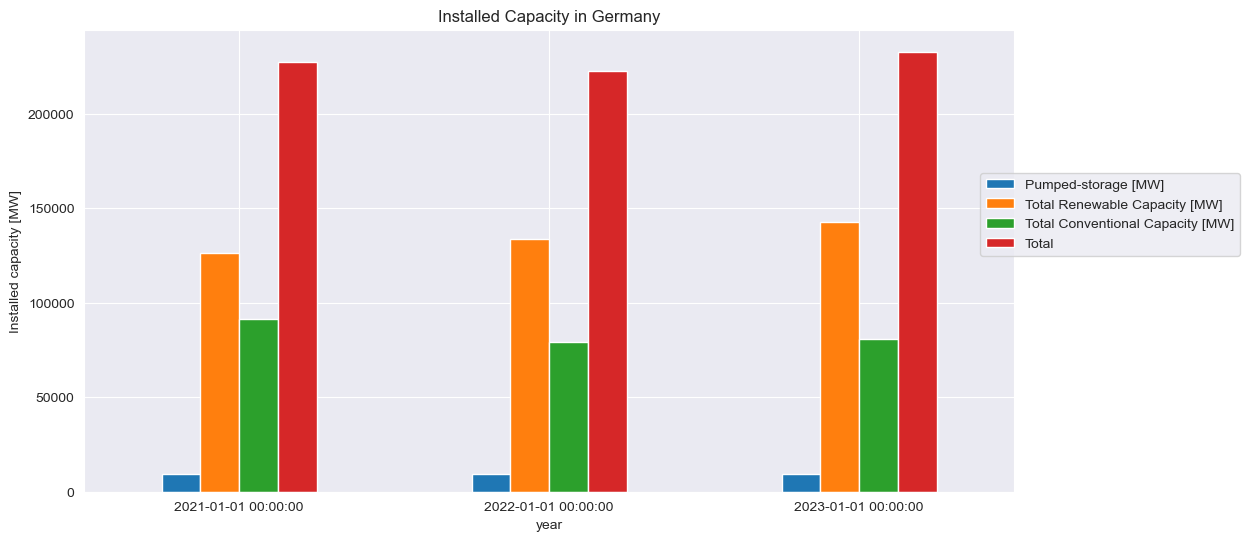

In [230]:
df_Total_IGC.plot(kind='bar', figsize=(12,6))
plt.xlabel('year')
plt.ylabel('Installed capacity [MW]')
plt.title('Installed Capacity in Germany')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
plt.show()

In [231]:
df_IGC.set_index('Timestamp', drop=True, inplace=True)

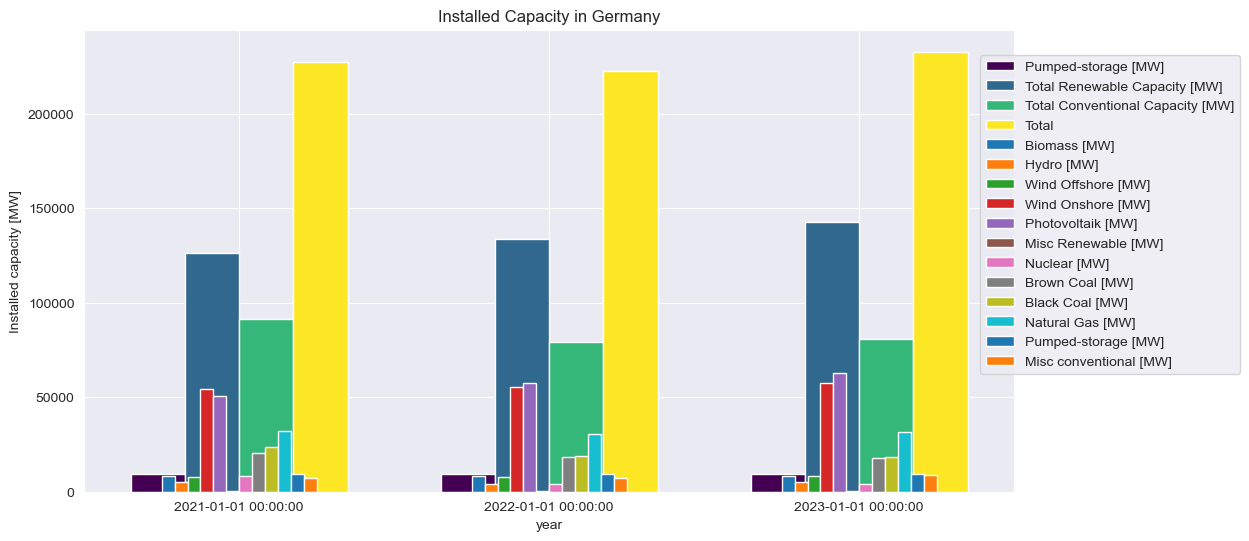

In [232]:
ax = df_Total_IGC.plot(kind='bar', colormap='viridis', width=0.7,)
df_IGC.plot(ax=ax, kind='bar', figsize=(12,6))
#df_IGC.plot(kind='bar', figsize=(12,6))
plt.xlabel('year')
plt.xticks(rotation = 0)
plt.ylabel('Installed capacity [MW]')
plt.title('Installed Capacity in Germany')
plt.legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
plt.show()


### Real generated energy

In [233]:
df_RGE.columns

Index(['Timestamp', 'Biomass [MWh]', 'Hydro [MWh]', 'Wind Offshore [MWh]',
       'Wind Onshore [MWh]', 'Photovoltaik [MWh]', 'Misc Renewable [MWh]',
       'Nuclear [MWh]', 'Brown Coal [MWh]', 'Black Coal [MWh]',
       'Natural Gas [MWh]', 'Pumped-storage [MWh]', 'Misc conventional [MWh]'],
      dtype='object')

In [234]:

df_Total_RGE = df_RGE.set_index('Timestamp', drop=True)
df_Total_RGE['Total Renewable Energy [MWh]'] = df_Total_RGE[['Biomass [MWh]', 'Hydro [MWh]', 'Wind Offshore [MWh]','Wind Onshore [MWh]', 'Photovoltaik [MWh]', 'Misc Renewable [MWh]']].apply(sum,axis=1)
df_Total_RGE['Total Conventional Energy [MWh]'] = df_Total_RGE[['Nuclear [MWh]', 'Brown Coal [MWh]', 'Black Coal [MWh]', 'Natural Gas [MWh]', 'Misc conventional [MWh]' ]].sum(axis=1)
df_Total_RGE['Total'] = df_Total_RGE[['Total Renewable Energy [MWh]', 'Total Conventional Energy [MWh]', 'Pumped-storage [MWh]']].sum(axis=1)
df_Total_RGE.drop(columns=['Biomass [MWh]', 'Hydro [MWh]', 'Wind Offshore [MWh]','Wind Onshore [MWh]', 'Photovoltaik [MWh]', 'Misc Renewable [MWh]', 'Nuclear [MWh]', 'Brown Coal [MWh]', 'Black Coal [MWh]', 'Natural Gas [MWh]', 'Misc conventional [MWh]'], inplace=True)

In [235]:
RGE_2021 = df_Total_RGE['2021-01-01' : '2022-01-01 00:00:00'].sum(axis=0)

In [236]:
RGE_2022 = df_Total_RGE['2022-01-01' : '2023-01-01 00:00:00'].sum(axis=0)

In [237]:
RGE_2023 = df_Total_RGE['2023-01-01' : '2024-01-01 00:00:00'].sum(axis=0)

In [238]:
RGE_21_23 = pd.DataFrame(list(zip(RGE_2021,RGE_2022,RGE_2023)), index=RGE_2021.index).transpose()

In [239]:
RGE_21_23.rename(index = {0:'2021', 1:'2022', 2:'2023'}, inplace=True)

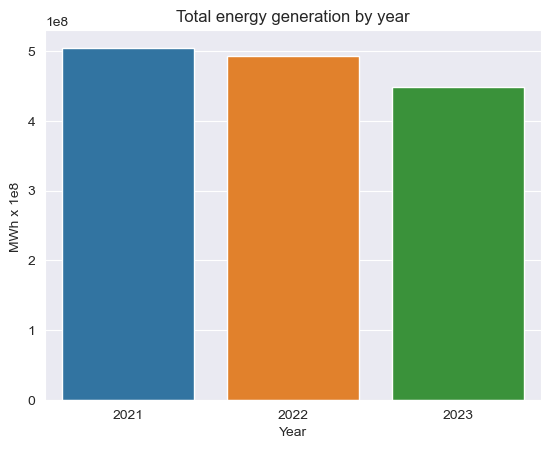

In [240]:
sns.barplot(data=RGE_21_23, x=RGE_21_23.index, y='Total')
plt.xlabel('Year')
plt.ylabel('MWh x 1e8 ')
plt.title('Total energy generation by year')
plt.show()

In [241]:
df_Total_RGE['year'] = df_Total_RGE.index

In [242]:
df_Total_RGE['day'] = df_Total_RGE['year'].dt.day_of_year
df_Total_RGE['year'] = df_Total_RGE['year'].dt.year

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

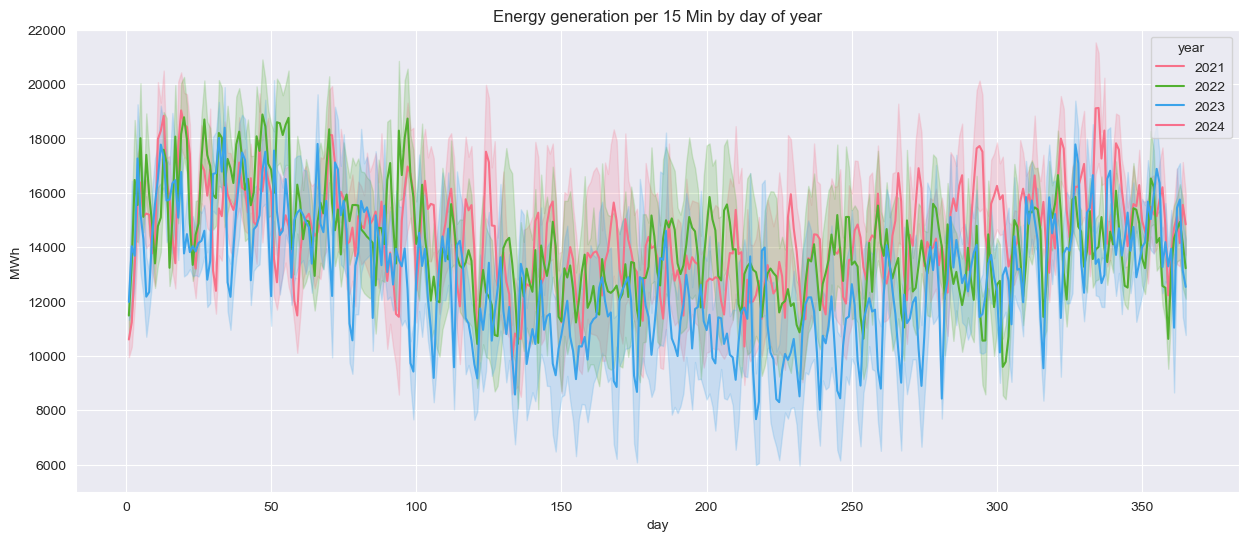

In [243]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df_Total_RGE, x='day', y='Total', hue='year', palette='husl', errorbar='sd')
plt.ylabel('MWh')
plt.title('Energy generation per 15 Min by day of year')
plt.ylim(5000, 22000)
plt.show()

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore a

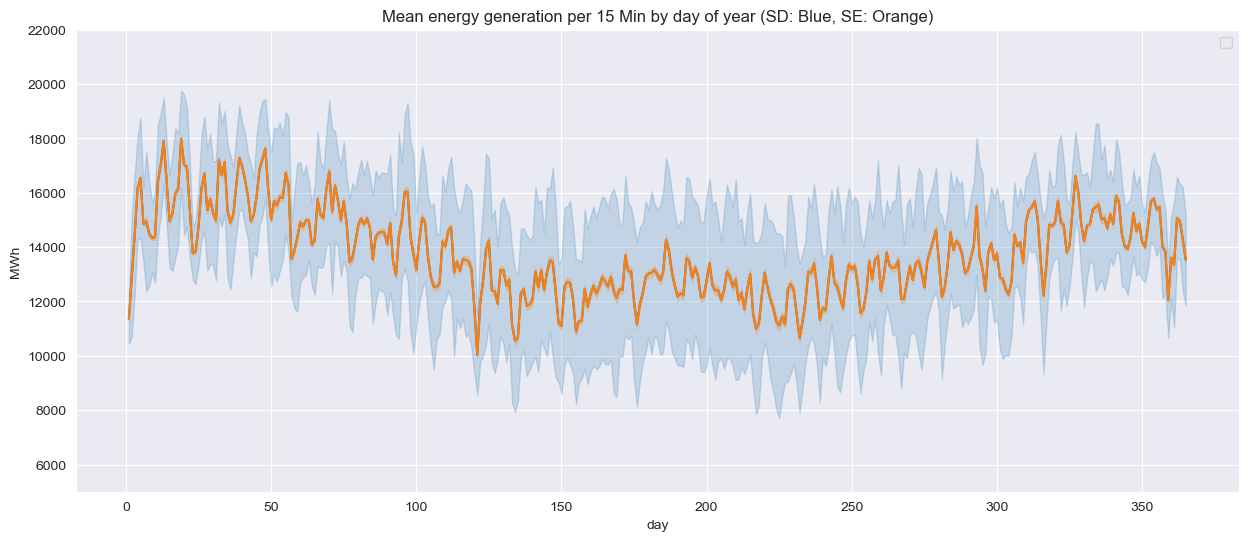

In [244]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df_Total_RGE, x='day', y='Total', errorbar='sd')
sns.lineplot(data=df_Total_RGE, x='day', y='Total', errorbar='se')
plt.legend()
plt.ylabel('MWh')
plt.title('Mean energy generation per 15 Min by day of year (SD: Blue, SE: Orange)')
plt.ylim(5000, 22000)
plt.show()

In [245]:
timeoffset = pd.Timedelta(minutes=15)
RGE_acc_day = df_Total_RGE[['Total','Pumped-storage [MWh]', 'Total Renewable Energy [MWh]','Total Conventional Energy [MWh]']].resample('D', offset=timeoffset ).sum()

In [246]:
RGE_acc_day['year'] = RGE_acc_day.index
RGE_acc_day['day'] = RGE_acc_day['year'].dt.day_of_year
RGE_acc_day['year'] = RGE_acc_day['year'].dt.year

In [247]:
RGE_acc_month = RGE_acc_day[['Total','Pumped-storage [MWh]', 'Total Renewable Energy [MWh]','Total Conventional Energy [MWh]']].resample('ME', offset=timeoffset ).sum()
RGE_acc_month['year'] = RGE_acc_month.index
RGE_acc_month['month'] = RGE_acc_month['year'].dt.month
RGE_acc_month['year'] = RGE_acc_month['year'].dt.year

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

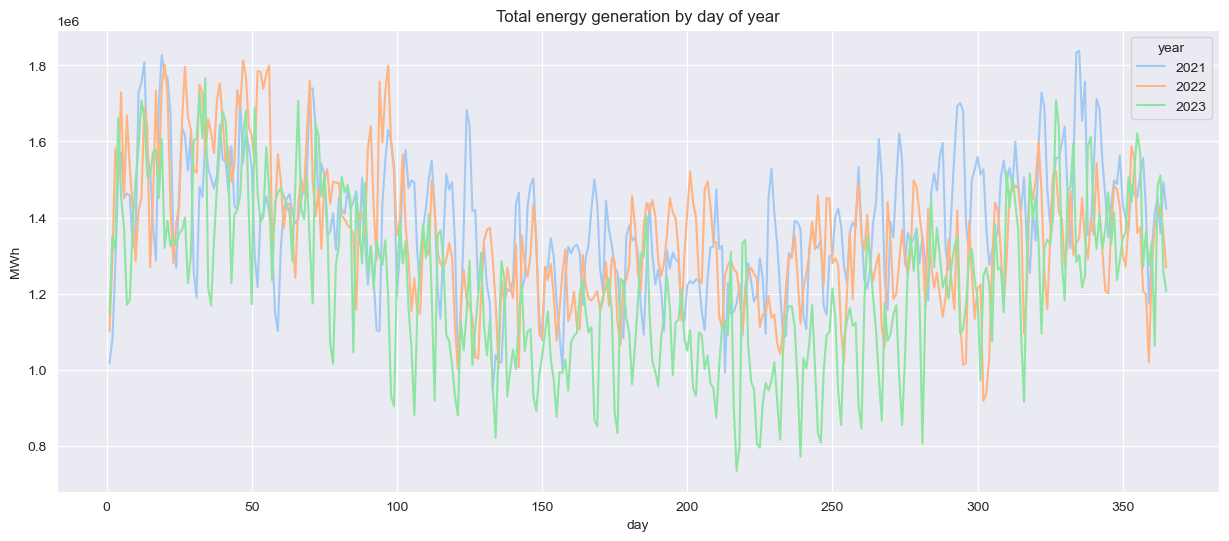

In [248]:
plt.figure(figsize=(15,6))
sns.lineplot(data=RGE_acc_day, x='day', y='Total', hue='year', palette='pastel')
#sns.lineplot(data=RGE_acc_month, x='month', y='Total', hue='year', palette='pastel')
plt.ylabel('MWh')
plt.title('Total energy generation by day of year')
#plt.ylim(5000, 22000)
plt.show()

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_a

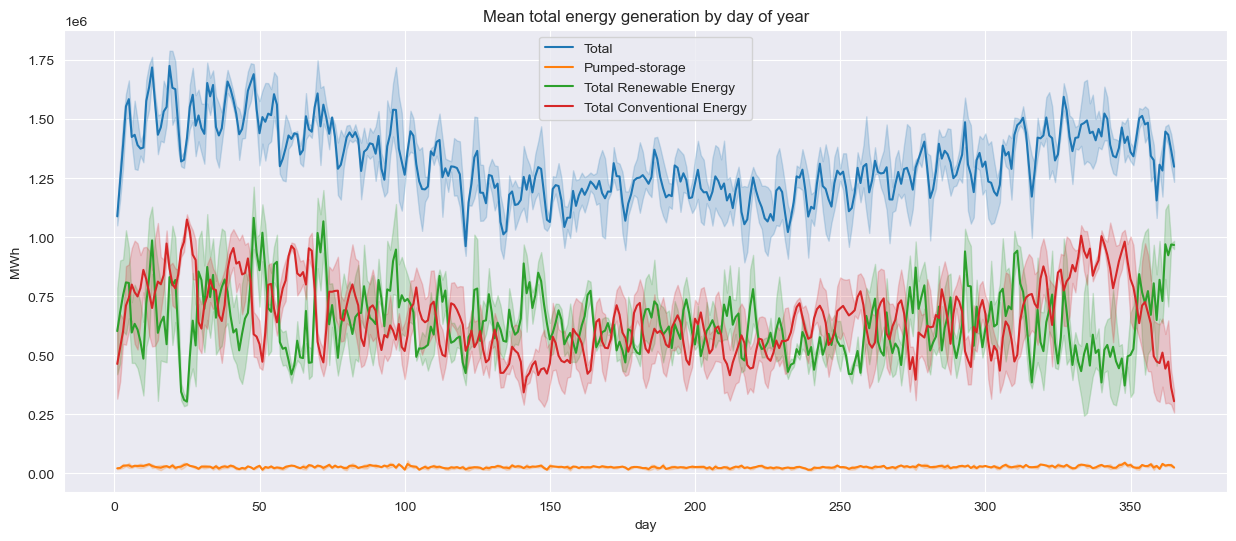

In [249]:
ax=plt.figure(figsize=(15,6))
sns.lineplot(data=RGE_acc_day, x='day', y=('Total'), errorbar='se', label='Total')
sns.lineplot(data=RGE_acc_day, x='day', y='Pumped-storage [MWh]', errorbar='se', label='Pumped-storage')
sns.lineplot(data=RGE_acc_day, x='day', y=('Total Renewable Energy [MWh]'), errorbar='se', label='Total Renewable Energy')
sns.lineplot(data=RGE_acc_day, x='day', y=('Total Conventional Energy [MWh]'), errorbar='se', label='Total Conventional Energy')
plt.ylabel('MWh')
plt.title('Mean total energy generation by day of year')
#ax.legend()
plt.show()

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

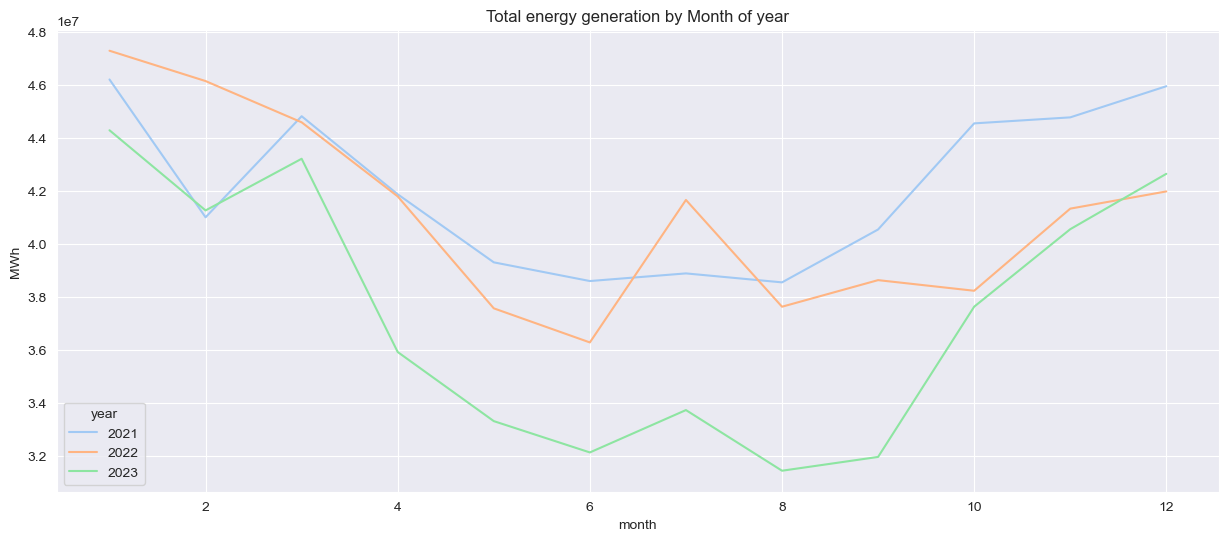

In [250]:
plt.figure(figsize=(15,6))
#sns.lineplot(data=RGE_acc_day, x='day', y='Total', hue='year', palette='pastel')
sns.lineplot(data=RGE_acc_month, x='month', y='Total', hue='year', palette='pastel')
plt.ylabel('MWh')
plt.title('Total energy generation by Month of year')
#plt.ylim(5000, 22000)
plt.show()

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grou

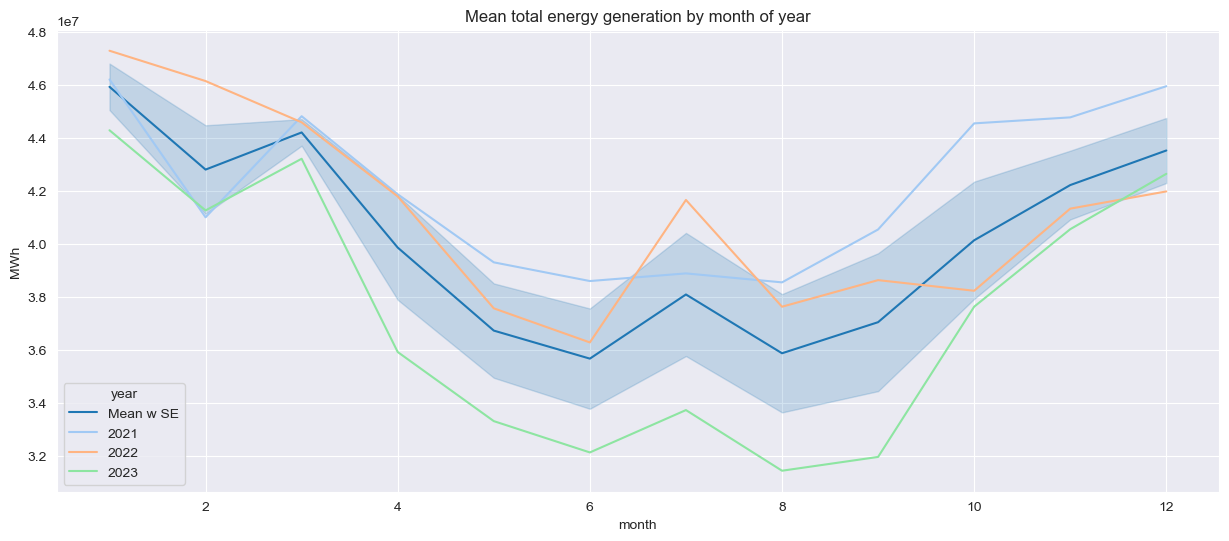

In [251]:
plt.figure(figsize=(15,6))
sns.lineplot(data=RGE_acc_month, x='month', y='Total', errorbar='se', label='Mean w SE')
sns.lineplot(data=RGE_acc_month, x='month', y='Total', hue='year', palette='pastel', legend=True)
plt.ylabel('MWh')
plt.title('Mean total energy generation by month of year')
#plt.ylim(5000, 22000)
plt.show()

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grou

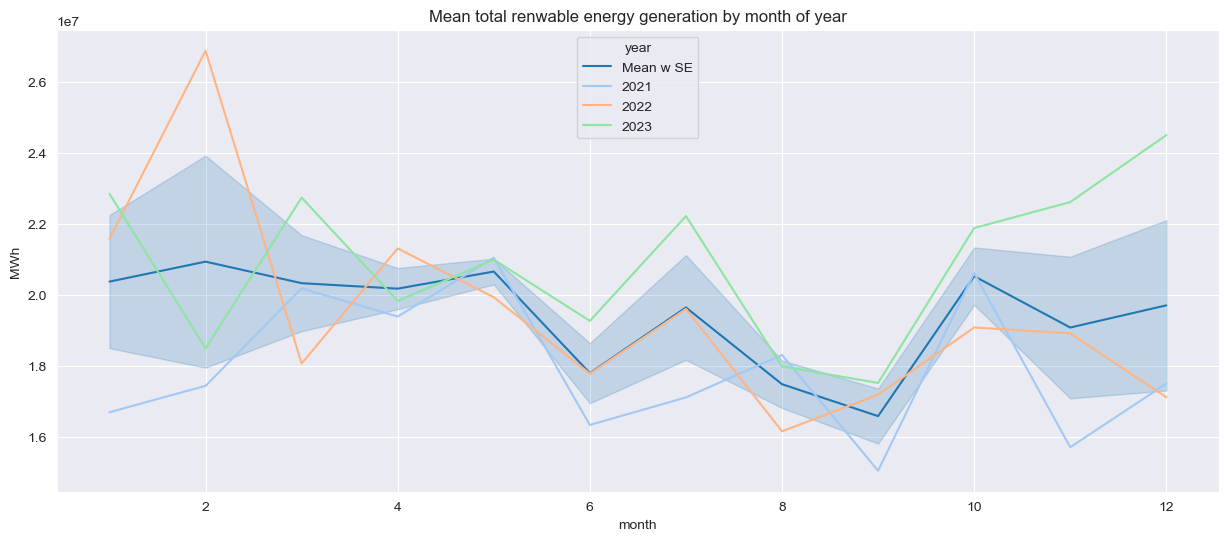

In [252]:
plt.figure(figsize=(15,6))
sns.lineplot(data=RGE_acc_month, x='month', y='Total Renewable Energy [MWh]', errorbar='se', label='Mean w SE')
sns.lineplot(data=RGE_acc_month, x='month', y='Total Renewable Energy [MWh]', hue='year', palette='pastel', legend=True)
plt.ylabel('MWh')
plt.title('Mean total renwable energy generation by month of year')
#plt.ylim(5000, 22000)
plt.show()

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grou

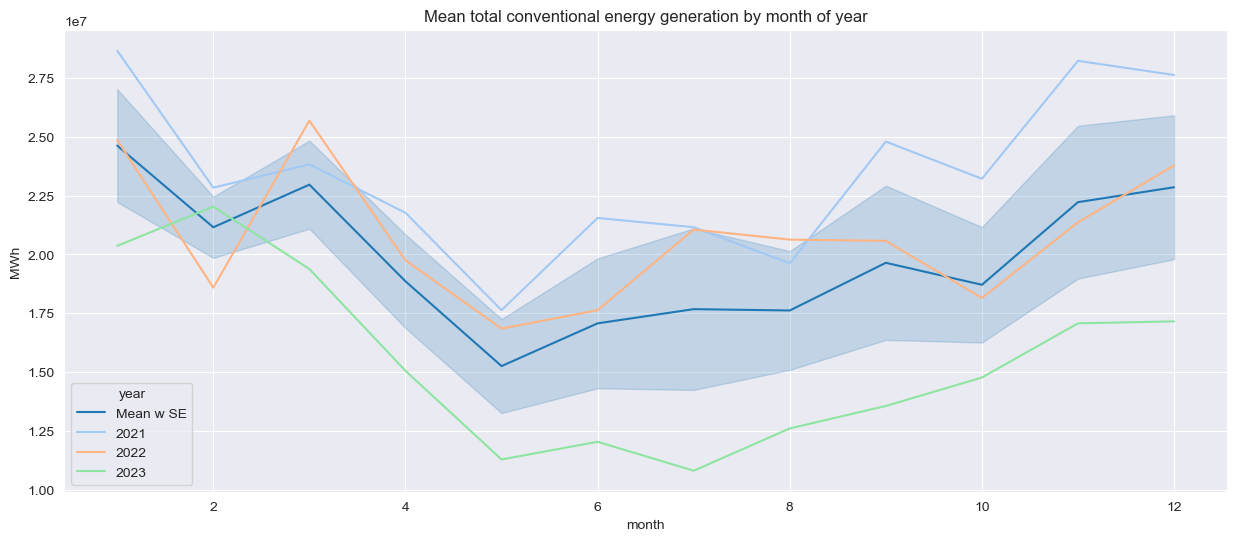

In [253]:
plt.figure(figsize=(15,6))
sns.lineplot(data=RGE_acc_month, x='month', y='Total Conventional Energy [MWh]', errorbar='se', label='Mean w SE')
sns.lineplot(data=RGE_acc_month, x='month', y='Total Conventional Energy [MWh]', hue='year', palette='pastel', legend=True)
plt.ylabel('MWh')
plt.title('Mean total conventional energy generation by month of year')
#plt.ylim(5000, 22000)
plt.show()

How does the daily generation look like let's say for Wed, 15/Jun/2022 and Wed, 15/Nov/2023?

<Figure size 1500x600 with 0 Axes>

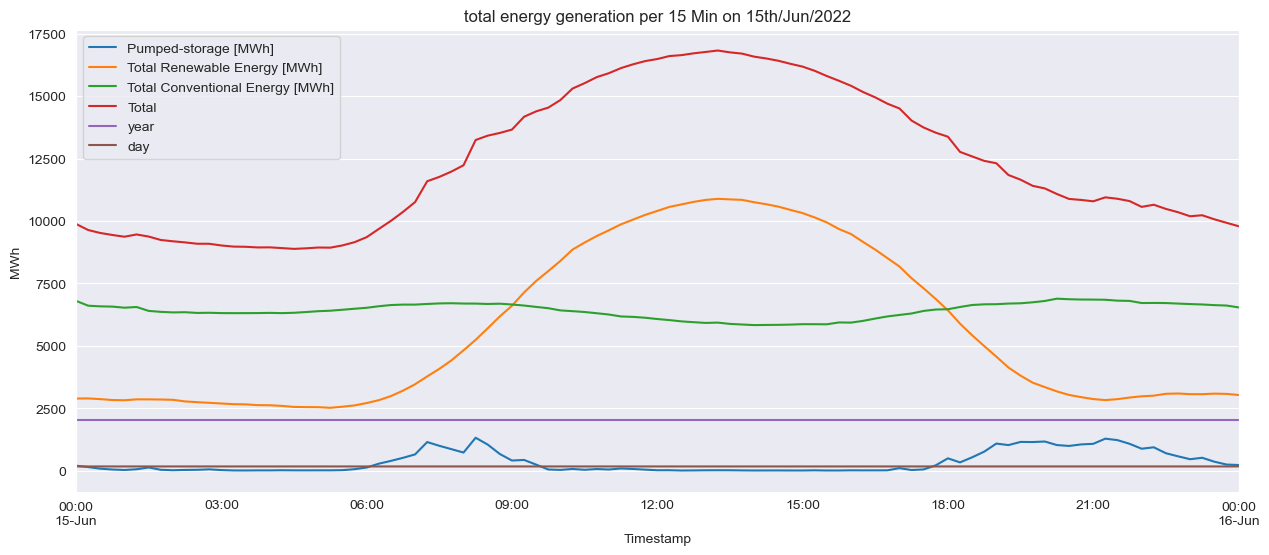

In [254]:
plt.figure(figsize=(15,6))
df_Total_RGE['2022-06-15' : '2022-06-16 00:00:00'].plot(figsize=(15,6))
plt.ylabel('MWh')
plt.title('total energy generation per 15 Min on 15th/Jun/2022')
plt.show()

<Figure size 1500x600 with 0 Axes>

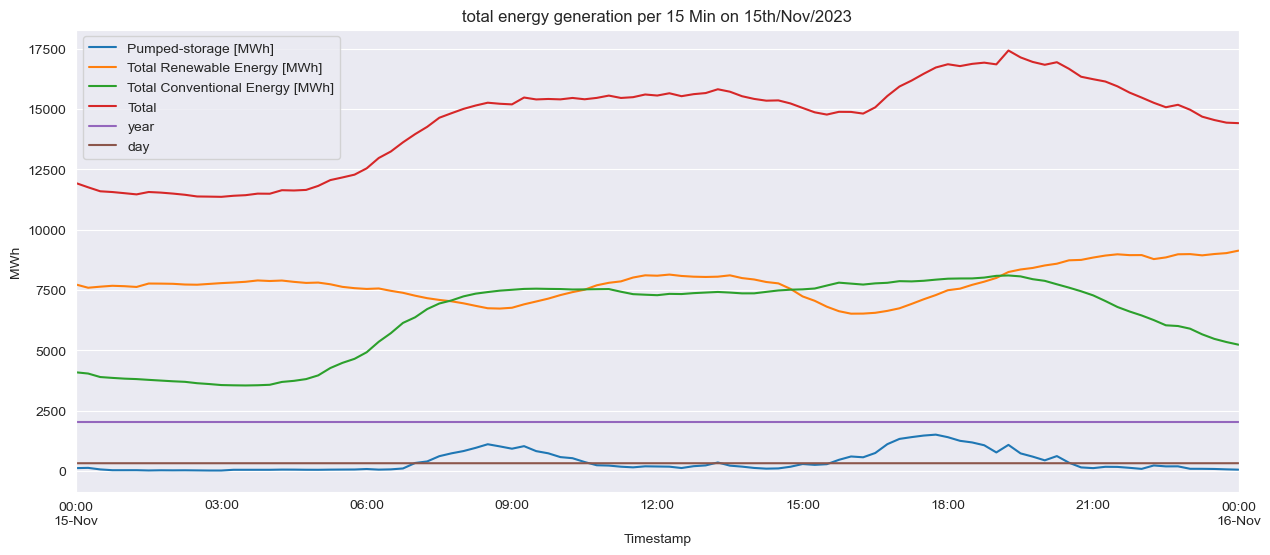

In [255]:
plt.figure(figsize=(15,6))
df_Total_RGE['2023-11-15' : '2023-11-16 00:00:00'].plot(figsize=(15,6))
plt.ylabel('MWh')
plt.title('total energy generation per 15 Min on 15th/Nov/2023')
plt.show()

In [256]:
df_RGE.set_index('Timestamp', drop=True, inplace=True)

<Figure size 1500x600 with 0 Axes>

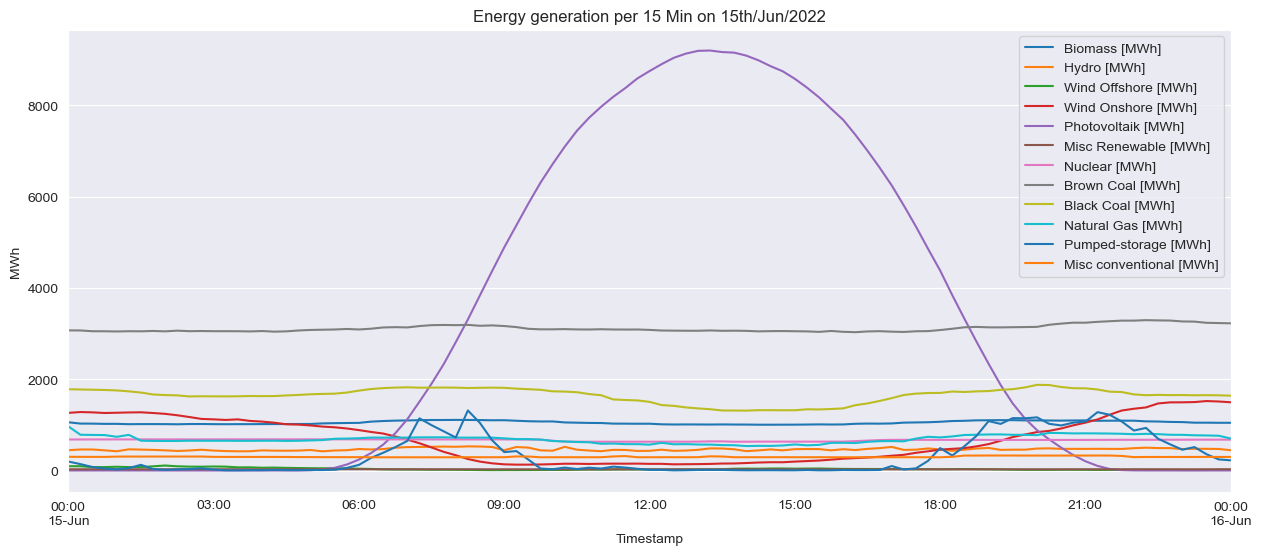

In [257]:
plt.figure(figsize=(15,6))
df_RGE['2022-06-15' : '2022-06-16 00:00:00'].plot(figsize=(15,6))
plt.ylabel('MWh')
plt.title('Energy generation per 15 Min on 15th/Jun/2022')
plt.show()

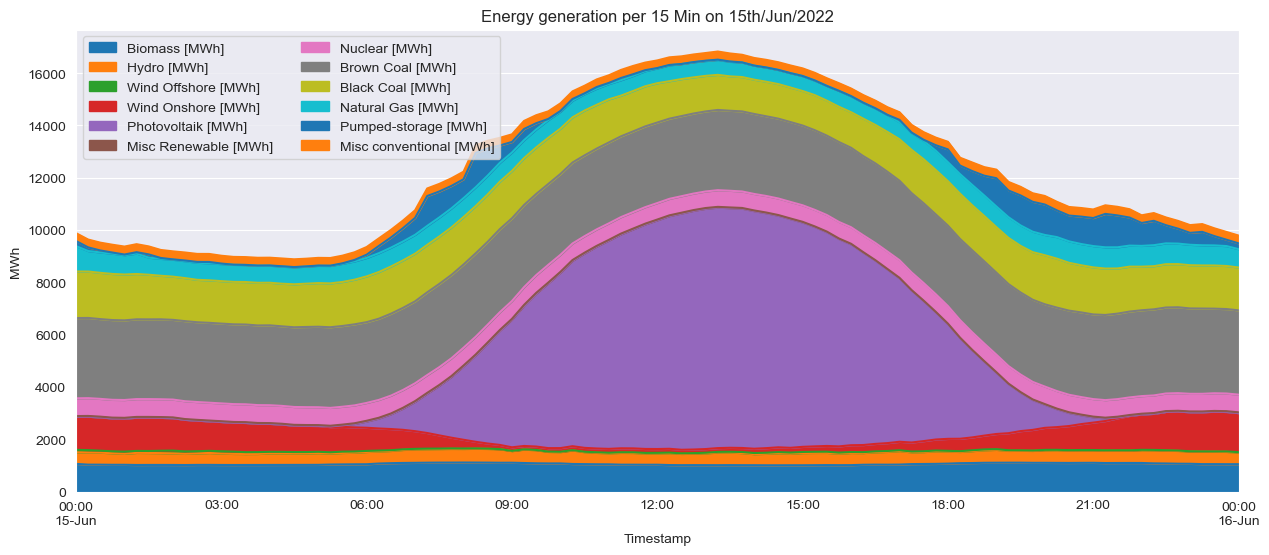

In [258]:
ax=df_RGE['2022-06-15' : '2022-06-16 00:00:00'].plot(kind='area', stacked=True, figsize=(15,6))
plt.ylabel('MWh')
plt.title('Energy generation per 15 Min on 15th/Jun/2022')
ax.legend(loc='upper left', ncol=2)
plt.show()

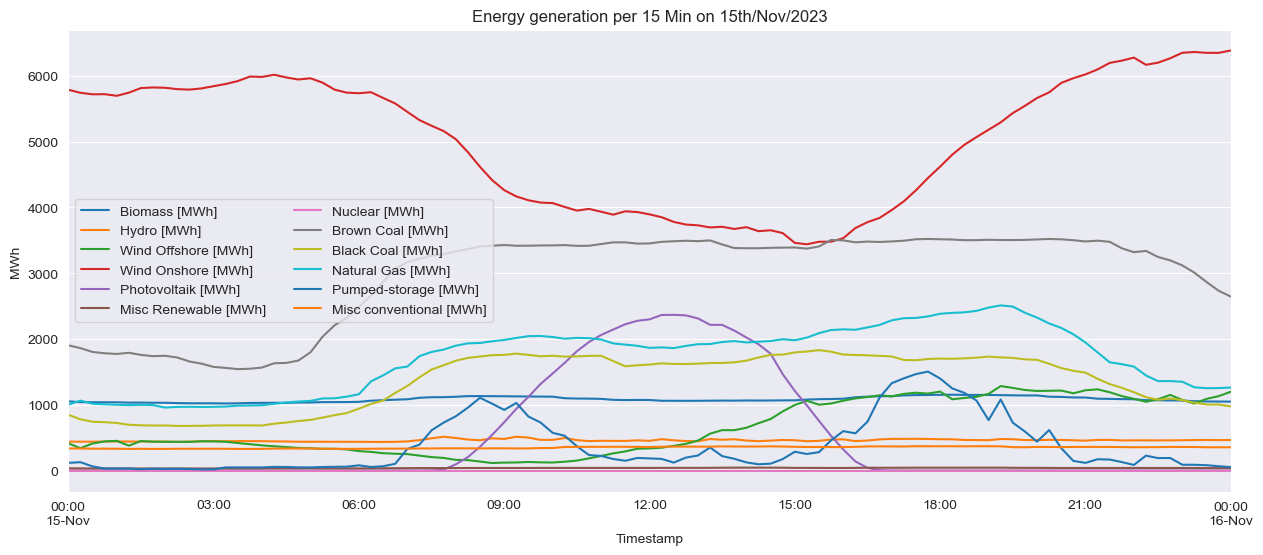

In [259]:

ax=df_RGE['2023-11-15' : '2023-11-16 00:00:00'].plot(figsize=(15,6))
plt.ylabel('MWh')
plt.title('Energy generation per 15 Min on 15th/Nov/2023')
ax.legend(loc='center left', ncol=2)
plt.show()

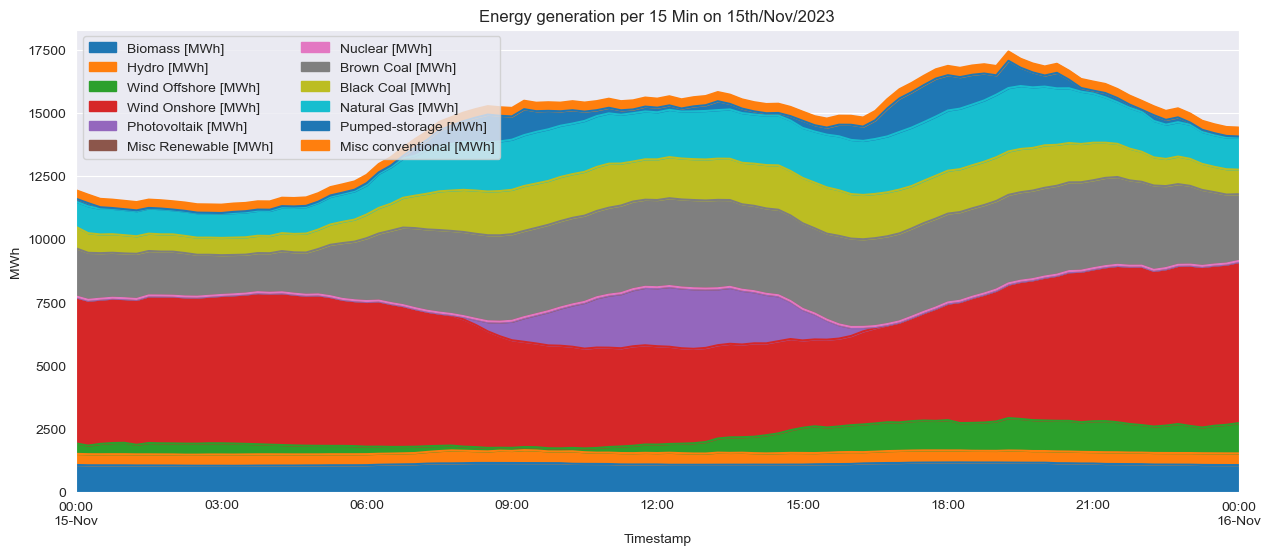

In [260]:
ax = df_RGE['2023-11-15' : '2023-11-16 00:00:00'].plot(figsize=(15,6), kind='area', stacked=True)
plt.ylabel('MWh')
plt.title('Energy generation per 15 Min on 15th/Nov/2023')
ax.legend(ncol=2)
plt.show()

In [261]:
fig = px.area(RGE_acc_month, y=['Total Renewable Energy [MWh]','Total Conventional Energy [MWh]','Pumped-storage [MWh]'])
fig.show()

## Insights so far:
- The total installed capacity is far greater than the generated energy (why? for spatially localised peaks in consumption?)
- in summer PV energy is considerable contributer even in a country like Germany. Peak contribution is nearly 10,000 MWh of energy
- brown coal and on shore wind power are also large contributer
- Installed offshore windpower is about 8000 MW, while onshore windpower has a capacity of 57,000 MW, which is around 7.13 times of offshore capacity
- Energy Generation in Jan is highest with 46 x 10^6 MWh while in June and August generation is lowest with 36 x 10^6 MWh
- More conventional energy is produced in the first and last quarter of an year.
- Renewable energy generation is more constant throughout hte year
- Renwable and conventional energy in sum produce similar amounts of energy. While pump storage is a marginal appearance 

### Consumed energy

In [262]:
df_RConE.set_index('Timestamp', drop=True, inplace=True)

In [263]:
RCon_acc_day = df_RConE[['Total (Grid Load) [MWh]','Residuallast [MWh]', 'Pumpspeicher [MWh]']].resample('D', offset=timeoffset ).sum()

In [264]:
RCon_acc_day['year'] = RCon_acc_day.index
RCon_acc_day['day'] = RCon_acc_day['year'].dt.day_of_year
RCon_acc_day['year'] = RCon_acc_day['year'].dt.year

In [265]:
RCon_acc_month = RCon_acc_day[['Total (Grid Load) [MWh]','Residuallast [MWh]', 'Pumpspeicher [MWh]']].resample('ME', offset=timeoffset ).sum()
RCon_acc_month['year'] = RCon_acc_month.index
RCon_acc_month['month'] = RCon_acc_month['year'].dt.month
RCon_acc_month['year'] = RCon_acc_month['year'].dt.year

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

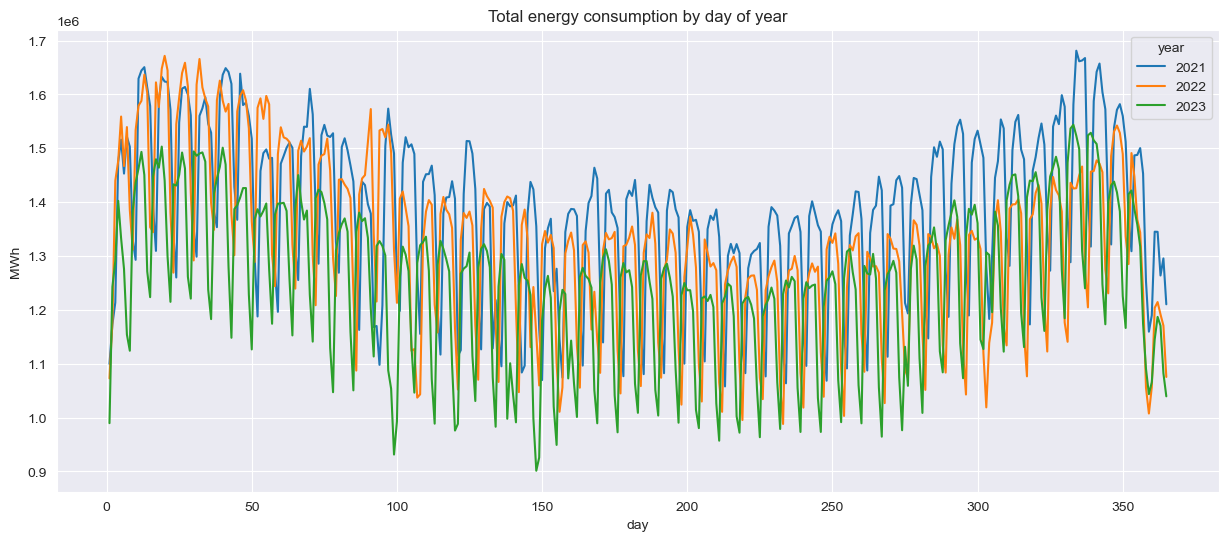

In [266]:
plt.figure(figsize=(15,6))
sns.lineplot(data=RCon_acc_day, x='day', y='Total (Grid Load) [MWh]', hue='year', palette='tab10')
plt.ylabel('MWh')
plt.title('Total energy consumption by day of year')
plt.show()

Wow! There is quite a cycle in here. Let's see if this is recurring on a daily basis. And what portion of energy is used for the cycles.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_a

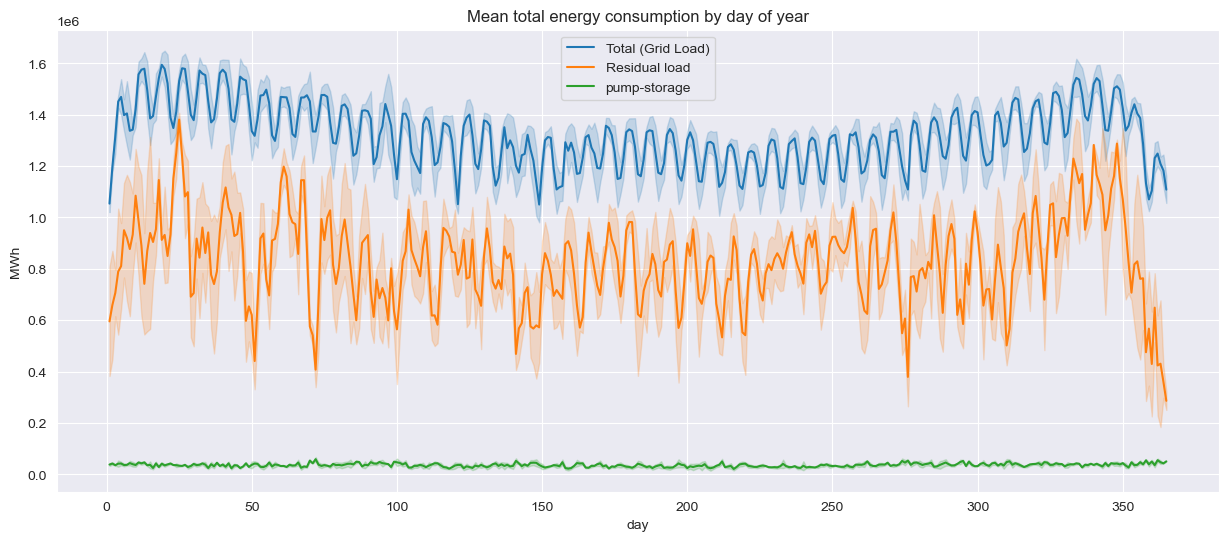

In [267]:
ax=plt.figure(figsize=(15,6))
sns.lineplot(data=RCon_acc_day, x='day', y='Total (Grid Load) [MWh]', errorbar='se', label='Total (Grid Load)')
sns.lineplot(data=RCon_acc_day, x='day', y='Residuallast [MWh]', errorbar='se', label='Residual load')
sns.lineplot(data=RCon_acc_day, x='day', y='Pumpspeicher [MWh]', errorbar='se', label='pump-storage')
plt.ylabel('MWh')
plt.title('Mean total energy consumption by day of year')
#ax.legend()
plt.show()

Interpretation of this graph: 
The residual load is the energy consumed after renewable energy has been deducted. This means this energy comes from conventional energy sources such as brown coal and nuclear power plants.
While Total and Residual load show a cycle, the cycle of the residual load is much more volatile. This is interesting, specially since coal and nuclear power are more useful for constant energy generation. Apparently this must be related to the way, how the energy consumption is calculated.

In [268]:
df_RConE['Renewable Load [MWh]'] = df_RConE['Total (Grid Load) [MWh]'] - df_RConE['Residuallast [MWh]'] - df_RConE['Pumpspeicher [MWh]']

<Figure size 1500x600 with 0 Axes>

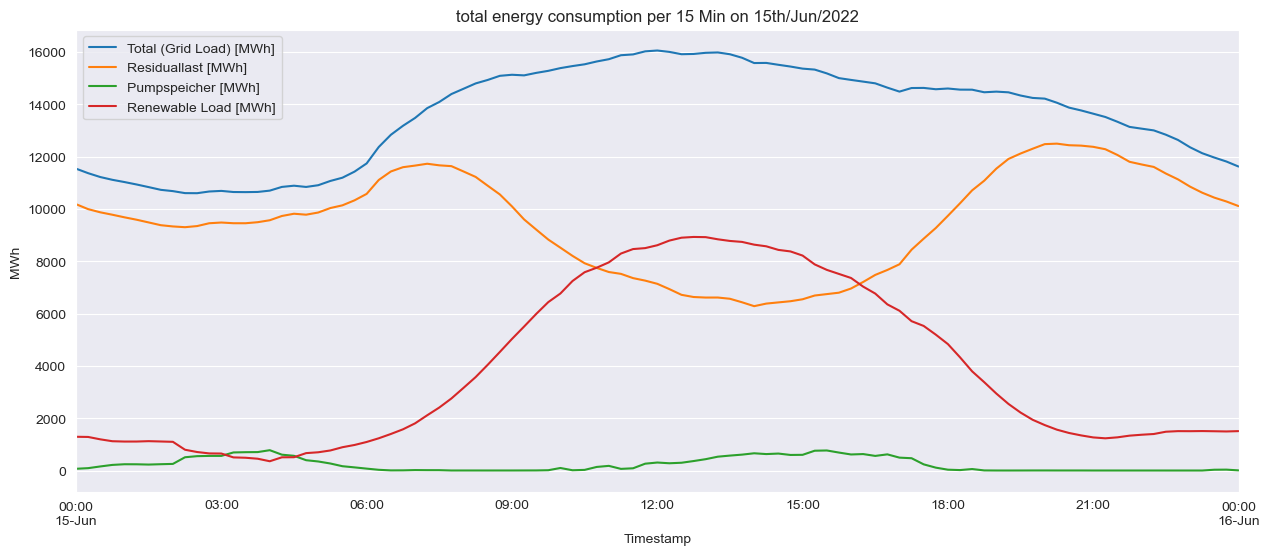

In [269]:
plt.figure(figsize=(15,6))
df_RConE['2022-06-15' : '2022-06-16 00:00:00'].plot(figsize=(15,6))
plt.ylabel('MWh')
plt.title('total energy consumption per 15 Min on 15th/Jun/2022')
plt.show()

<Figure size 1500x600 with 0 Axes>

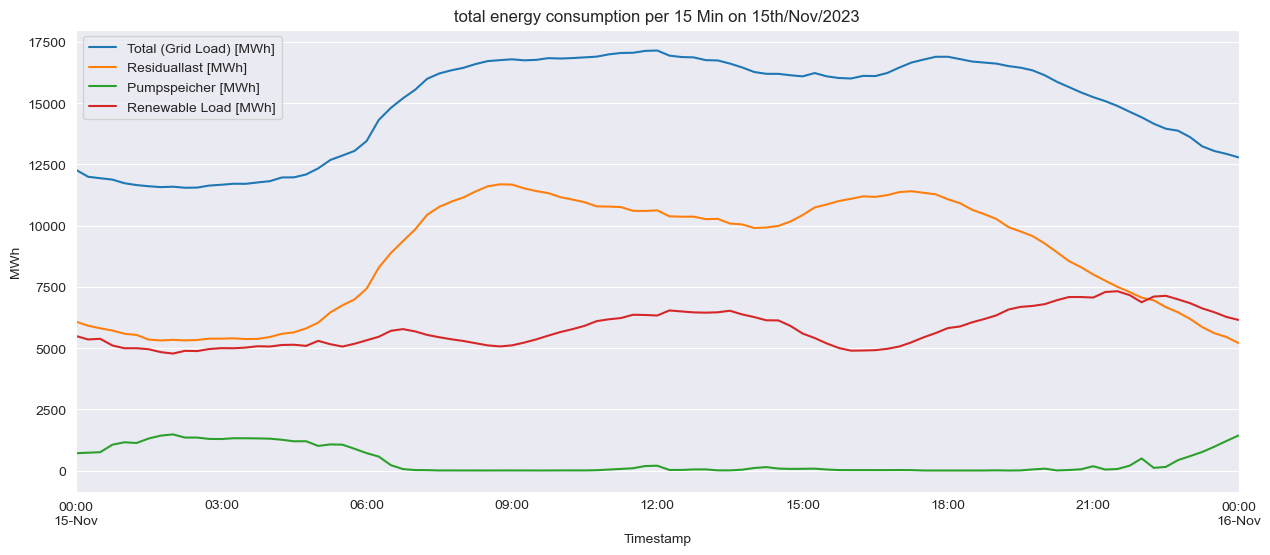

In [270]:
plt.figure(figsize=(15,6))
df_RConE['2023-11-15' : '2023-11-16 00:00:00'].plot(figsize=(15,6))
plt.ylabel('MWh')
plt.title('total energy consumption per 15 Min on 15th/Nov/2023')
plt.show()

In [271]:
df_RConE.columns

Index(['Total (Grid Load) [MWh]', 'Residuallast [MWh]', 'Pumpspeicher [MWh]',
       'Renewable Load [MWh]'],
      dtype='object')

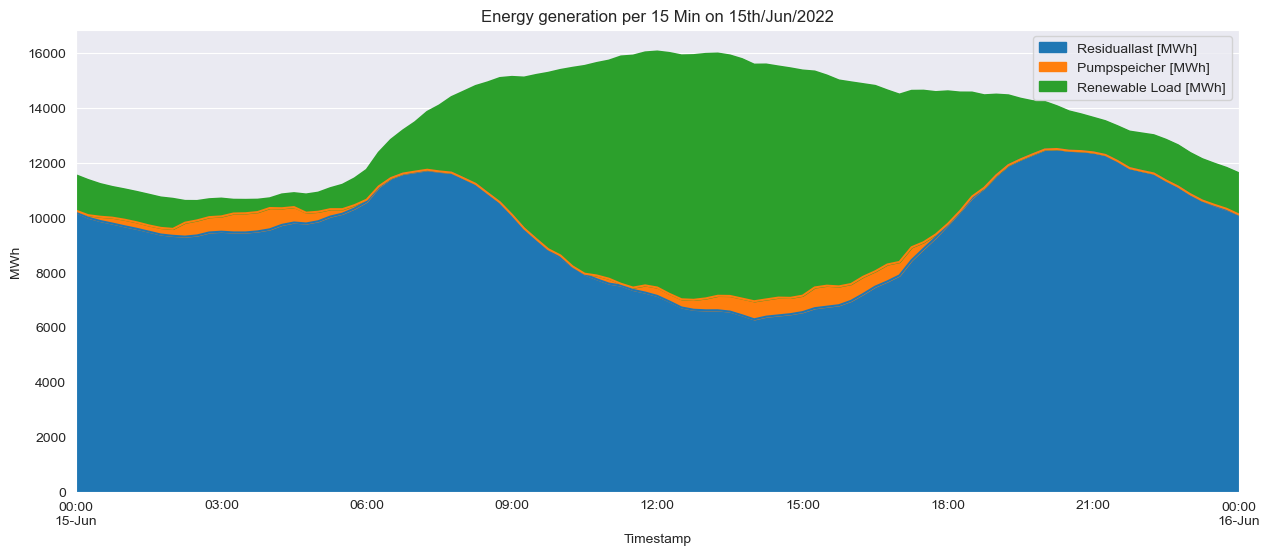

In [272]:
df_RConE['2022-06-15' : '2022-06-16 00:00:00'].plot(y=['Residuallast [MWh]', 'Pumpspeicher [MWh]','Renewable Load [MWh]' ] ,kind='area', stacked=True, figsize=(15,6))
#ax2=df_RConE['2022-06-15' : '2022-06-16 00:00:00'].plot(y='Total (Grid Load) [MWh]')
plt.ylabel('MWh')
plt.title('Energy generation per 15 Min on 15th/Jun/2022')
#ax.legend(loc='upper left', ncol=2)
plt.show()

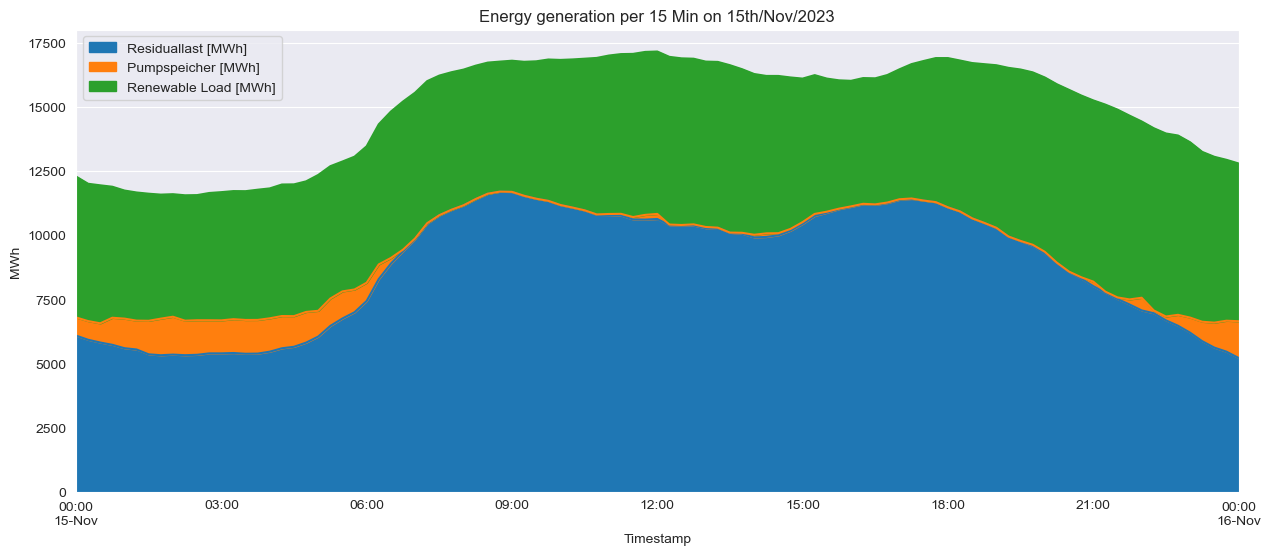

In [273]:
df_RConE['2023-11-15' : '2023-11-16 00:00:00'].plot(figsize=(15,6), kind='area', stacked=True, y=['Residuallast [MWh]', 'Pumpspeicher [MWh]','Renewable Load [MWh]'])
plt.ylabel('MWh')
plt.title('Energy generation per 15 Min on 15th/Nov/2023')
ax.legend(ncol=2)
plt.show()

The Renewable Energy is consumed first. The want of the market is filled first with the cheapest available generator, which is generally pump-storage, PV, Windpower. conventional plants are more expensive and therefore come later in filling the demand gap. The most expensive offer, which made it to sell on the market decides the price for every other producer. Making the margin of PV and Windpower much higher. Also renewables get a certain minimum compensation for their generation as caonsequence of the "Erneuerbaren Energie Gesetz" (EEG). This is done in order to make them more lucrative ans thus attractive to operate.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_a

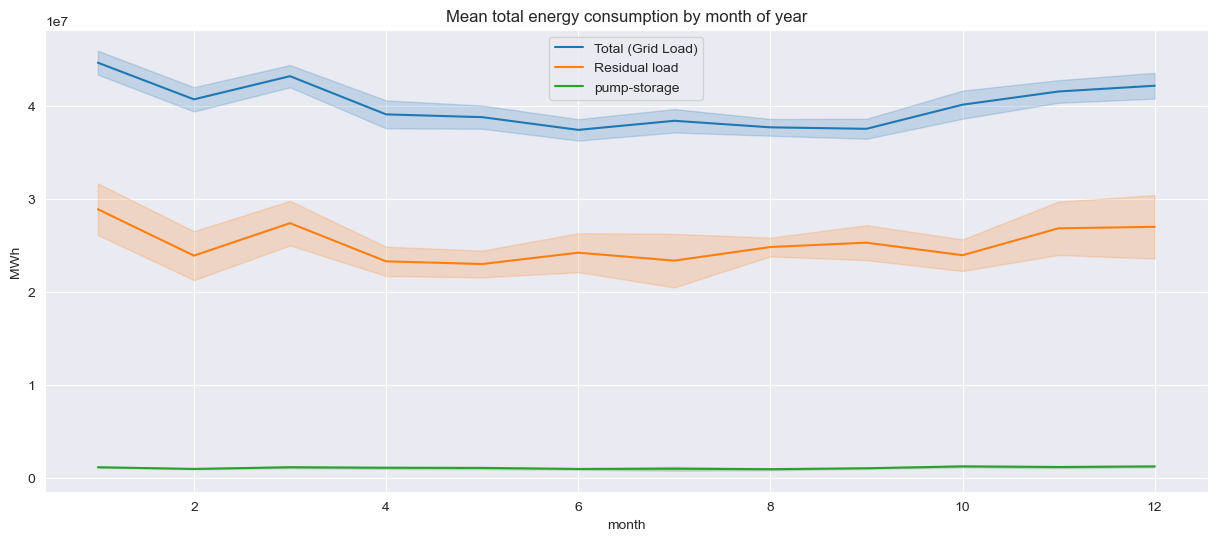

In [274]:
RCon_acc_month['Renewable Load [MWh]'] = RCon_acc_month['Total (Grid Load) [MWh]'] - RCon_acc_month['Residuallast [MWh]'] - RCon_acc_month['Pumpspeicher [MWh]']
ax=plt.figure(figsize=(15,6))
sns.lineplot(data=RCon_acc_month, x='month', y='Total (Grid Load) [MWh]', errorbar='se', label='Total (Grid Load)')
sns.lineplot(data=RCon_acc_month, x='month', y='Residuallast [MWh]', errorbar='se', label='Residual load')
sns.lineplot(data=RCon_acc_month, x='month', y='Pumpspeicher [MWh]', errorbar='se', label='pump-storage')
#sns.lineplot(data=RCon_acc_month, x='month', y='Renewable Load [MWh]', errorbar='se', label='Renewable load')
plt.ylabel('MWh')
plt.title('Mean total energy consumption by month of year')
#ax.legend()
plt.show()

In [275]:
fig = px.area(RCon_acc_month, y= ['Renewable Load [MWh]','Residuallast [MWh]','Pumpspeicher [MWh]'], 
              title='Stacked overview of consumed energy by month', 
              labels=dict(value="Energy consumed [MWh]", Timestamp='Time')
              )
fig.show()

In [276]:
RCon_acc_day['Renewable Load [MWh]'] = RCon_acc_day['Total (Grid Load) [MWh]'] - RCon_acc_day['Residuallast [MWh]'] - RCon_acc_day['Pumpspeicher [MWh]']

In [277]:
fig = px.area(RCon_acc_day, y=['Renewable Load [MWh]','Residuallast [MWh]','Pumpspeicher [MWh]'],
              title="Stacked overview of consumed energy by day",
              labels=dict(value='Energy consumed [MWh]', Timestamp="Time")
              )
fig.show()

## Insights so far:
- The total installed capacity is far greater than the generated energy <font color='red'>(why? for spatially localised peaks in consumption?)</font>
- in summer PV energy is a considerable contributer even in a country like Germany. Peak contribution is nearly 10,000 MWh of energy
- brown coal and on shore wind power are also large contributer
- Installed offshore windpower is about 8000 MW, while onshore windpower has a capacity of 57,000 MW, which is around 7.13 times of offshore capacity
- Energy Generation in Jan is highest with 46 x 10^6 MWh while in June and August generation is lowest with 36 x 10^6 MWh
- More conventional energy is produced in the first and last quarter of an year.
- Renewable energy generation is more constant throughout the year
- Renwable and conventional energy in sum produce similar amounts of energy. While pump storage is a marginal appearance 
- There is a weekly cycle. Sundays the consumption is lowest and gets reduced from friday. Monday it's back on plateu level.
- Renewable Energy is consumed first and therefore more completely.

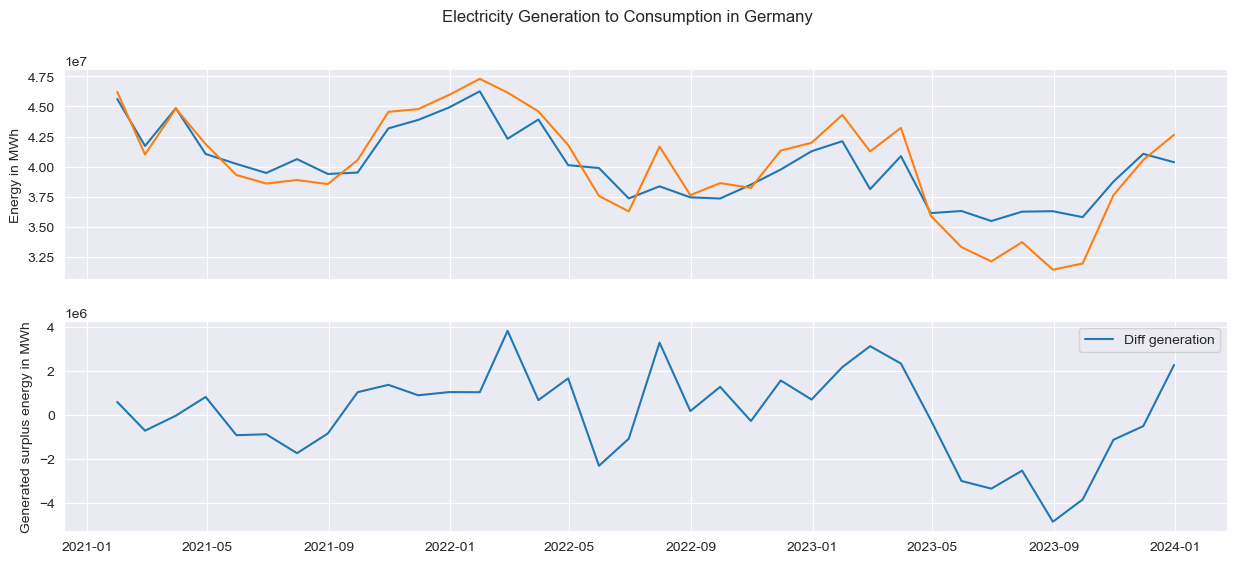

In [278]:
from matplotlib import ticker

fig, (ax1, ax2)= plt.subplots(2,1, figsize=(15,6), sharex=True)
fig.suptitle('Electricity Generation to Consumption in Germany')
ax1.plot(RCon_acc_month['Total (Grid Load) [MWh]'], label='Consumed Energy')
ax1.plot(RGE_acc_month['Total'], label='Generated Energy')
ax1.set_ylabel('Energy in MWh')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter())

ax2.plot(RGE_acc_month['Total']-RCon_acc_month['Total (Grid Load) [MWh]'], label="Diff generation")
ax2.set_ylabel('Generated surplus energy in MWh')
plt.legend()
plt.show()

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



Text(0, 0.5, 'Energy [MWh]')

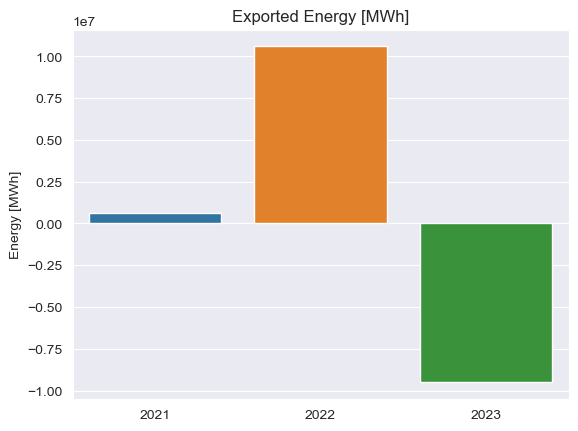

In [279]:
export = [
    (RGE_acc_month['Total']['2021-01-01' : '2022-01-01 00:00:00']-RCon_acc_month['Total (Grid Load) [MWh]']['2021-01-01' : '2022-01-01 00:00:00']).sum(),
    (RGE_acc_month['Total']['2022-01-01' : '2023-01-01 00:00:00']-RCon_acc_month['Total (Grid Load) [MWh]']['2022-01-01' : '2023-01-01 00:00:00']).sum(),
    (RGE_acc_month['Total']['2023-01-01' : '2024-01-01 00:00:00']-RCon_acc_month['Total (Grid Load) [MWh]']['2023-01-01' : '2024-01-01 00:00:00']).sum()
    ]
year = [2021, 2022, 2023]

sns.barplot(x=year, y=export)
plt.title("Exported Energy [MWh]")
plt.ylabel("Energy [MWh]")

### Electric Market

In [280]:
df_MP.set_index('Timestamp', drop=True, inplace=True)

In [281]:
df_MP.columns

Index(['Germany/Luxemburg [€/MWh]', 'Avg Neighbours DE/LU [€/MWh]',
       'Belgium [€/MWh]', 'Denmark 1 [€/MWh]', 'Denmark 2 [€/MWh]',
       'France [€/MWh]', 'Netherlands [€/MWh]', 'Norway 2 [€/MWh]',
       'Austria [€/MWh]', 'Poland [€/MWh]', 'Sweden 4 [€/MWh]',
       'Swiss [€/MWh]', 'Czech Rep [€/MWh]', 'Italy (North) [€/MWh]',
       'Slowenia [€/MWh]', 'Hungary [€/MWh]'],
      dtype='object')

In [282]:
fig = px.area(df_MP, y= ['Germany/Luxemburg [€/MWh]'], 
              title='Prices', 
              labels=dict(value="Price [€/MWh]", Timestamp='Time')
              )
fig.show()

In [283]:
MP_DE = df_MP.loc[:,['Germany/Luxemburg [€/MWh]']]
MP_DE['year'] = MP_DE.index
MP_DE['day'] = MP_DE['year'].dt.day_of_year
MP_DE['year'] = MP_DE['year'].dt.year

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

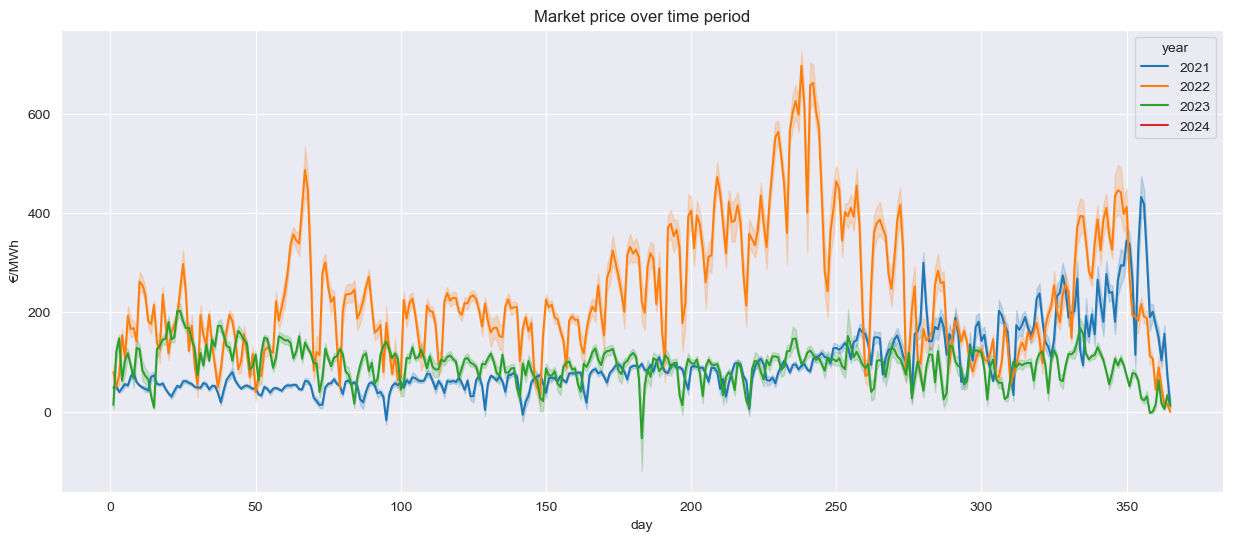

In [284]:
plt.figure(figsize=(15,6))
sns.lineplot(data=MP_DE, x='day', y='Germany/Luxemburg [€/MWh]', hue='year', palette='tab10')
plt.ylabel('€/MWh')
plt.title('Market price over time period')
plt.show()

In [285]:
MP_mean_month = MP_DE.resample('ME', offset=timeoffset ).mean()
MP_mean_month['year'] = MP_mean_month.index
MP_mean_month['month'] = MP_mean_month['year'].dt.month
MP_mean_month['year'] = MP_mean_month['year'].dt.year

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grou

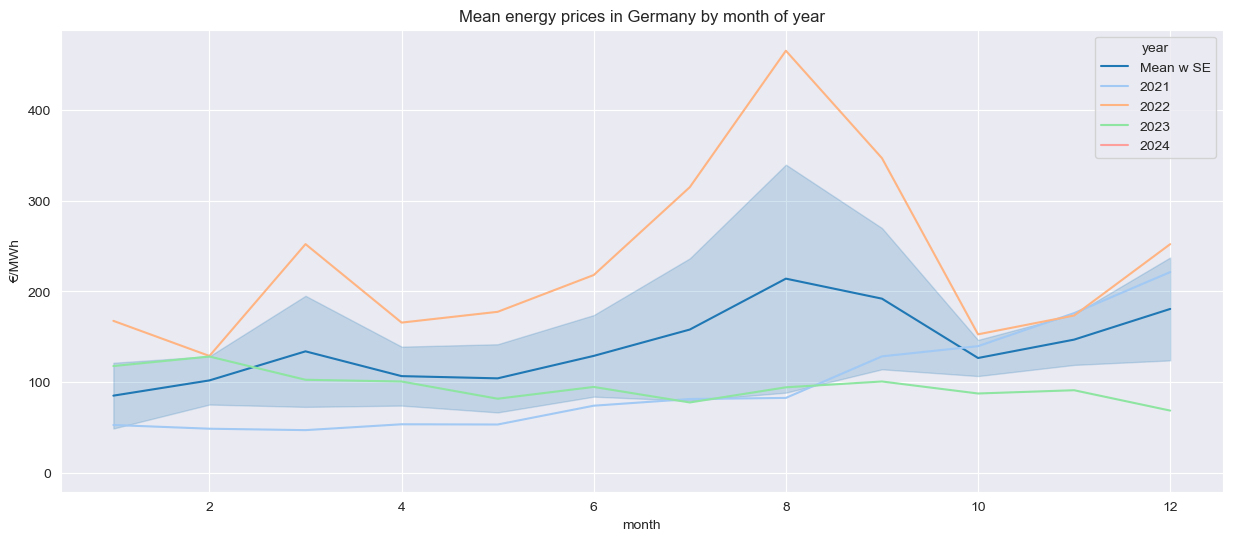

In [286]:
figure = plt.figure(figsize=(15,6))
sns.lineplot(data=MP_mean_month, x='month', y='Germany/Luxemburg [€/MWh]', errorbar='se', label='Mean w SE')
sns.lineplot(data=MP_mean_month, x='month', y='Germany/Luxemburg [€/MWh]', hue='year', palette='pastel', legend=True)
plt.ylabel('€/MWh')
plt.title('Mean energy prices in Germany by month of year')
plt.show()

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_a

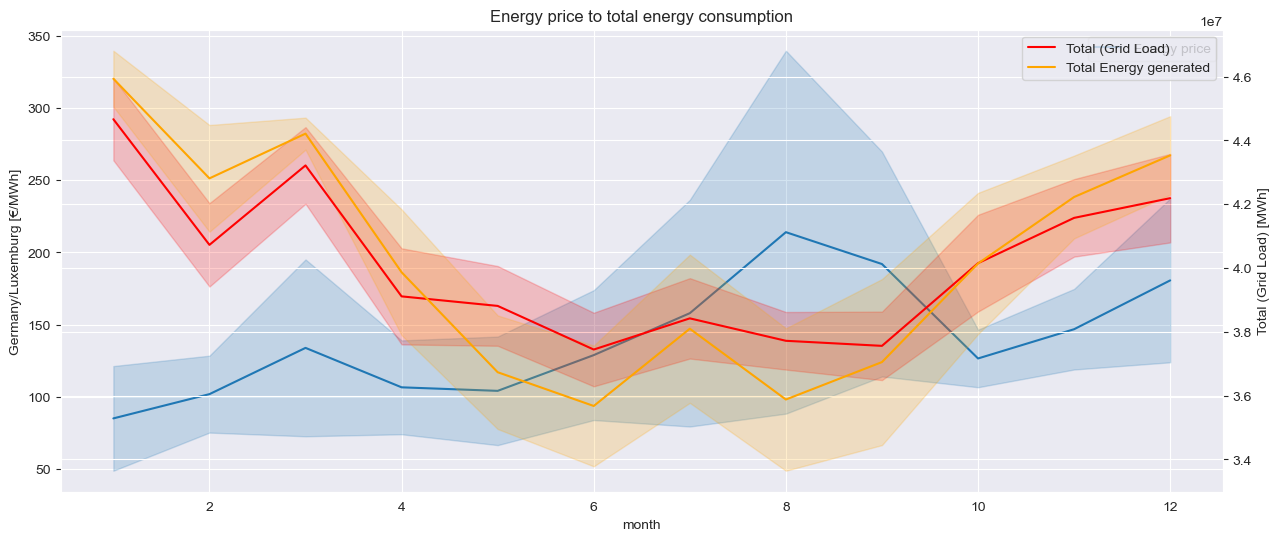

In [287]:
fig, ax1 = plt.subplots(1,1, figsize=(15,6))
ax1 = sns.lineplot(data=MP_mean_month, x='month', y='Germany/Luxemburg [€/MWh]', errorbar='se', label='Energy price')
ax2 = ax1.twinx()
ax2=sns.lineplot(data=RCon_acc_month, x='month', y='Total (Grid Load) [MWh]', errorbar='se', label='Total (Grid Load)', color='red')
ax2=sns.lineplot(data=RGE_acc_month, x='month', y='Total', errorbar='se', label= 'Total Energy generated', color = 'orange')
plt.title('Energy price to total energy consumption')
plt.legend()
plt.show()

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



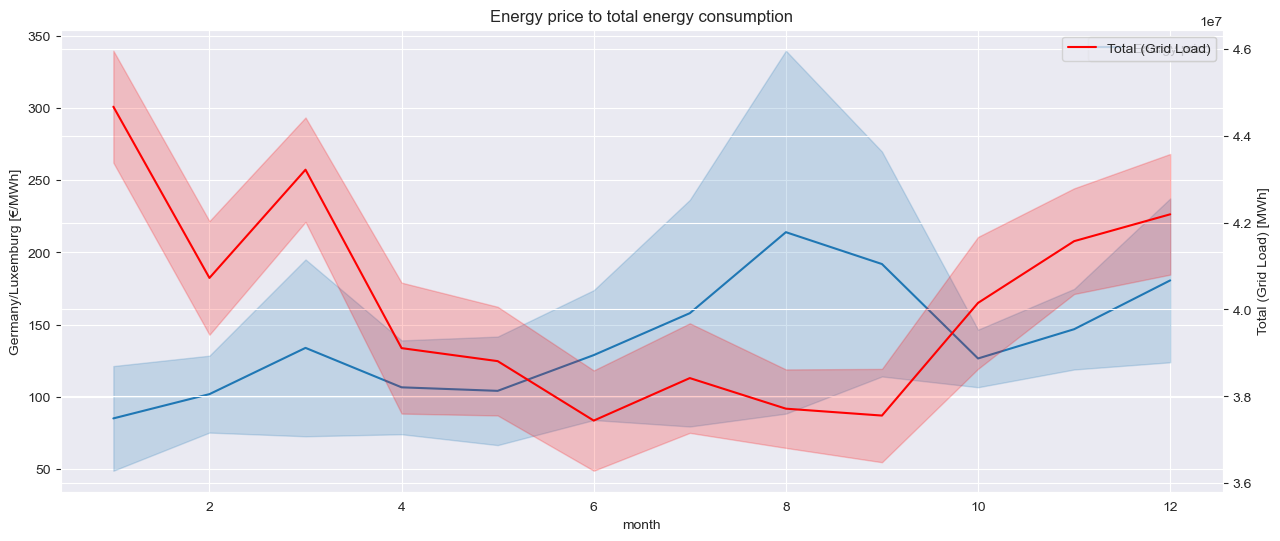

In [288]:
fig, ax1 = plt.subplots(1,1, figsize=(15,6))
ax1 = sns.lineplot(data=MP_mean_month, x='month', y='Germany/Luxemburg [€/MWh]', errorbar='se', label='Energy price')
ax2 = ax1.twinx()
sns.lineplot(data=RCon_acc_month, x='month', y='Total (Grid Load) [MWh]', errorbar='se', label='Total (Grid Load)', color='red')
plt.title('Energy price to total energy consumption')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


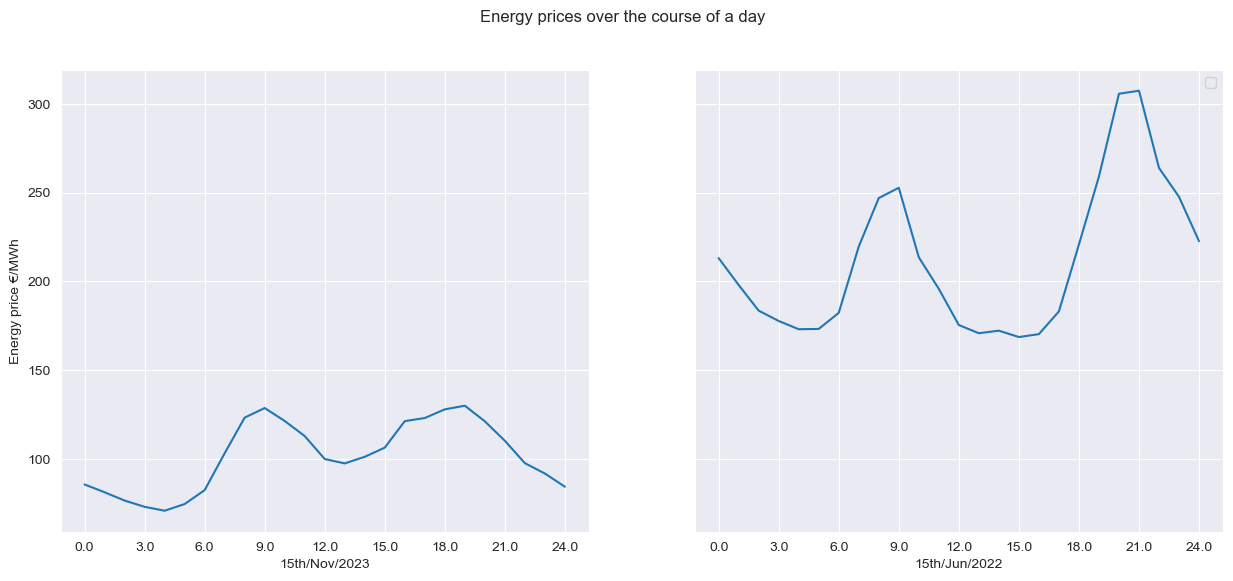

In [289]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(15,6), sharey=True)
fig.suptitle('Energy prices over the course of a day')
ax1.plot(MP_DE['2023-11-15' : '2023-11-16 00:00:00']['Germany/Luxemburg [€/MWh]'])
ax1.set_xlabel('15th/Nov/2023')
ax1.set_ylabel('Energy price €/MWh')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(lambda x, pos:str((x-19676)*24))

ax2.plot(MP_DE['2022-06-15' : '2022-06-16 00:00:00']['Germany/Luxemburg [€/MWh]'])
ax2.set_xlabel('15th/Jun/2022')
ax2.xaxis.set_major_formatter(lambda x, pos:str((x-19158)*24))
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


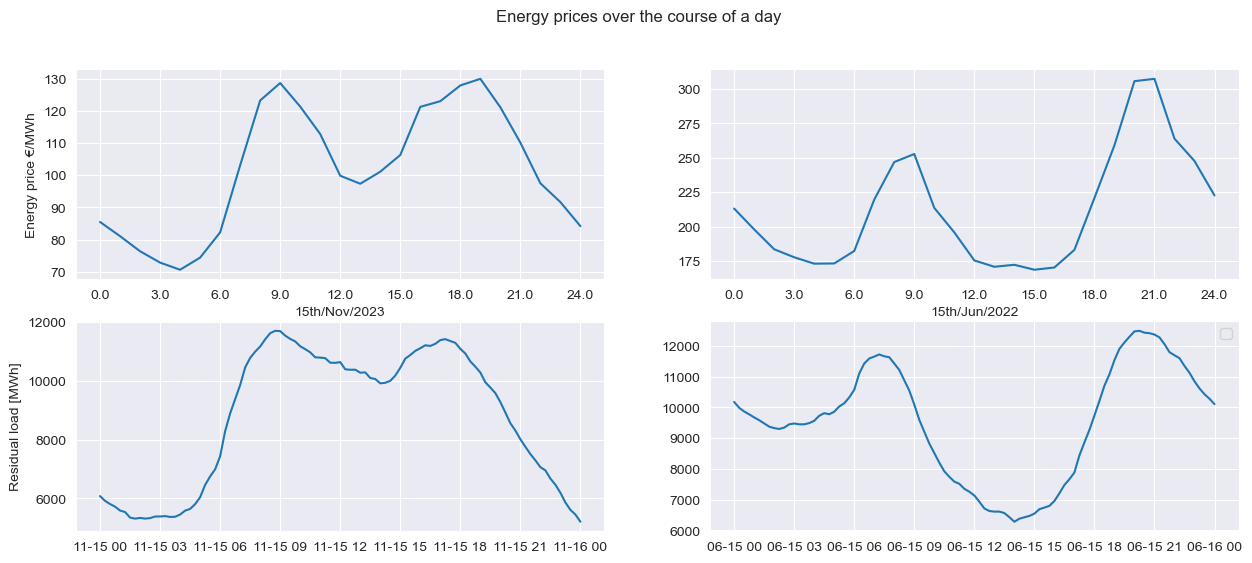

In [290]:
fig, axs= plt.subplots(2,2, figsize=(15,6))
fig.suptitle('Energy prices over the course of a day')
axs[0,0].plot(MP_DE['2023-11-15' : '2023-11-16 00:00:00']['Germany/Luxemburg [€/MWh]'])
axs[0,0].set_xlabel('15th/Nov/2023')
axs[0,0].set_ylabel('Energy price €/MWh')
axs[1,0].set_ylabel('Residual load [MWh]')
axs[0,0].yaxis.set_major_formatter(ticker.ScalarFormatter())
axs[0,0].xaxis.set_major_formatter(lambda x, pos:str((x-19676)*24))
axs[1,0].plot(df_RConE['2023-11-15' : '2023-11-16 00:00:00']['Residuallast [MWh]'])

axs[0,1].plot(MP_DE['2022-06-15' : '2022-06-16 00:00:00']['Germany/Luxemburg [€/MWh]'])
axs[0,1].set_xlabel('15th/Jun/2022')
axs[0,1].xaxis.set_major_formatter(lambda x, pos:str((x-19158)*24))
axs[1,1].plot(df_RConE['2022-06-15' : '2022-06-16 00:00:00']['Residuallast [MWh]'])
plt.legend()
plt.show()


In [291]:
# There is a clear connection between the residual load and the energy price.
# let's see if there is a similar connection when seen over the course of a year


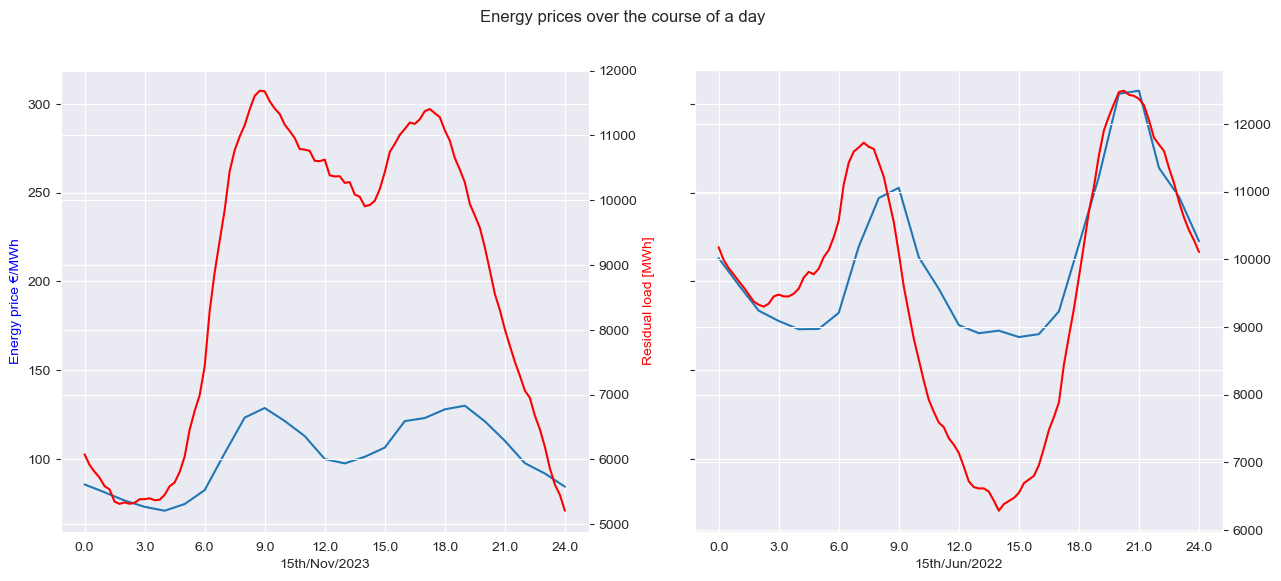

In [292]:
fig, axs= plt.subplots(1,2, figsize=(15,6), sharey=True)
fig.suptitle('Energy prices over the course of a day')
axs[0].plot(MP_DE['2023-11-15' : '2023-11-16 00:00:00']['Germany/Luxemburg [€/MWh]'], label='Price')
axs[0].set_xlabel('15th/Nov/2023')
axs[0].set_ylabel('Energy price €/MWh', color='blue')
axs[0].yaxis.set_major_formatter(ticker.ScalarFormatter())
axs[0].xaxis.set_major_formatter(lambda x, pos:str((x-19676)*24))

ax0 = axs[0].twinx()
ax0.set_ylabel('Residual load [MWh]', color='red')
ax0.plot(df_RConE['2023-11-15' : '2023-11-16 00:00:00']['Residuallast [MWh]'], color = 'red', label='Residual Load')

axs[1].plot(MP_DE['2022-06-15' : '2022-06-16 00:00:00']['Germany/Luxemburg [€/MWh]'], label='Price')
axs[1].set_xlabel('15th/Jun/2022')
axs[1].xaxis.set_major_formatter(lambda x, pos:str((x-19158)*24))

ax1=axs[1].twinx()
ax1.plot(df_RConE['2022-06-15' : '2022-06-16 00:00:00']['Residuallast [MWh]'], color = 'red', label='Residual Load')
plt.show()

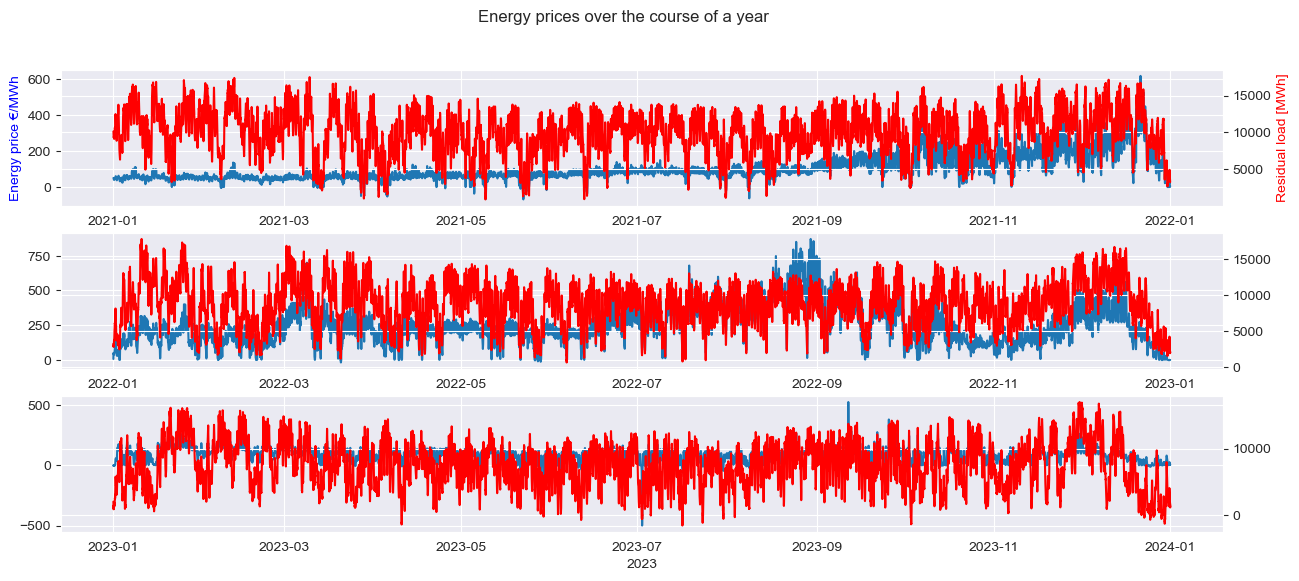

In [293]:
fig, axs= plt.subplots(3,1, figsize=(15,6), sharey=False)
fig.suptitle('Energy prices over the course of a year')
axs[0].plot(MP_DE['2021-01-01' : '2022-01-01 00:00:00']['Germany/Luxemburg [€/MWh]'])
axs[0].set_xlabel('2021')
axs[0].set_ylabel('Energy price €/MWh', color='blue')
axs[0].yaxis.set_major_formatter(ticker.ScalarFormatter())
#axs[0].xaxis.set_major_formatter(lambda x, pos:str((x-19676)*24))

ax0 = axs[0].twinx()
ax0.set_ylabel('Residual load [MWh]', color='red')
ax0.plot(df_RConE['2021-01-01' : '2022-01-01 00:00:00']['Residuallast [MWh]'], color = 'red')

axs[1].plot(MP_DE['2022-01-01' : '2023-01-01 00:00:00']['Germany/Luxemburg [€/MWh]'])
axs[1].set_xlabel('2022')
#axs[1].xaxis.set_major_formatter(lambda x, pos:str((x-19158)*24))

ax1=axs[1].twinx()
ax1.plot(df_RConE['2022-01-01' : '2023-01-01 00:00:00']['Residuallast [MWh]'], color = 'red')

axs[2].plot(MP_DE['2023-01-01' : '2024-01-01 00:00:00']['Germany/Luxemburg [€/MWh]'])
axs[2].set_xlabel('2023')
#axs[2].xaxis.set_major_formatter(lambda x, pos:str((x-19158)*24))

ax2=axs[2].twinx()
ax2.plot(df_RConE['2023-01-01' : '2024-01-01 00:00:00']['Residuallast [MWh]'], color = 'red')

plt.show()


In [294]:
RConE_mean_month = df_RConE.resample('ME', offset=timeoffset ).mean()
RConE_mean_month['year'] = RConE_mean_month.index
RConE_mean_month['month'] = RConE_mean_month['year'].dt.month
RConE_mean_month['year'] = RConE_mean_month['year'].dt.year

In [295]:
RConE_mean_month.head()

Total (Grid Load) [MWh]  Residuallast [MWh]  Pumpspeicher [MWh]  \
Timestamp                                                                     
2021-01-31             15329.872941        11274.197059          359.948235   
2021-02-28             15522.220052        10619.409877          335.823103   
2021-03-31             15092.447762         9864.285077          348.971568   
2021-04-30             14255.420660         9068.051997          331.367708   
2021-05-31             13517.532678         8158.449429          309.213878   

            Renewable Load [MWh]  year  month  
Timestamp                                      
2021-01-31           3695.727647  2021      1  
2021-02-28           4566.987072  2021      2  
2021-03-31           4879.191117  2021      3  
2021-04-30           4856.000955  2021      4  
2021-05-31           5049.869372  2021      5

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

<Axes: xlabel='month', ylabel='Residuallast [MWh]'>

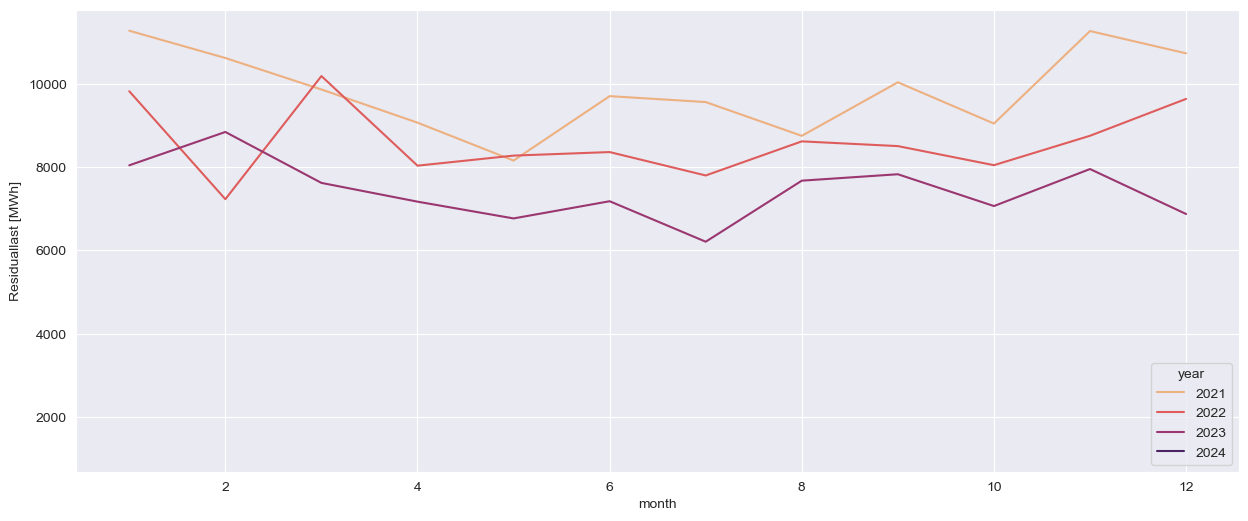

In [296]:
plt.figure(figsize=(15,6))
sns.lineplot(data=RConE_mean_month, x='month', y='Residuallast [MWh]', hue='year', palette='flare')

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\sager\anaconda3\envs\IADS\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

<Axes: xlabel='month', ylabel='Germany/Luxemburg [€/MWh]'>

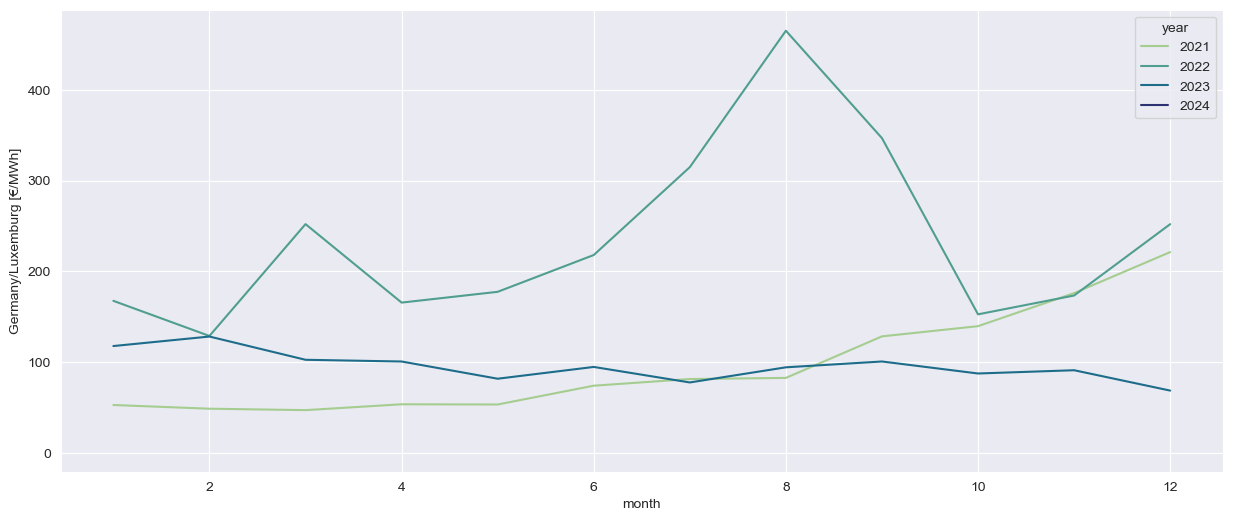

In [297]:
plt.figure(figsize=(15,6))
sns.lineplot(data=MP_mean_month, x='month', y='Germany/Luxemburg [€/MWh]', hue='year', palette='crest')

## Summary of Insights:
- The total installed capacity is far greater than the generated energy
- in summer PV energy is a considerable contributer even in a country like Germany. Peak contribution is nearly 10,000 MWh of energy
- brown coal and onshore wind power are also large contributer
- Installed offshore windpower is about 8000 MW, while onshore windpower has a capacity of 57,000 MW, which is around 7.13 times of offshore capacity
- Energy Generation in Jan is highest with 46 x 10^6 MWh while in June and August generation is lowest with 36 x 10^6 MWh
- More conventional energy is produced in the first and last quarter of an year.
- Renewable energy generation is more constant throughout the year
- Renwable and conventional energy in sum produce similar amounts of energy. While pump storage is a marginal appearance 
- There is a weekly cycle. Sundays the consumption is lowest and gets reduced from friday. Monday it's back on plateu level.
- Renewable Energy is consumed first and therefore more completely.
- The market prices are connect with the residual load of consumed energy. This can be explained by the way, how the demand of energy is filled by the cheapest energy generatin first and then subsequently by more expensive forms of generation. The most expensive form of generation which just managed to close the gap between demand and offer sets the price for the whole market. Traditionally the conventional means of generating energy, i.e. fossil fuels and fission are most expensive. 
- In the market price data, specially for 2022 it's obvious, that while the pattern of the curve of the residual load is followed, it has a rapid increase in value. This is the result of the post-COVID world and the Russian-Ukraine war. 